<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Note" data-toc-modified-id="Note-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Note</a></span></li><li><span><a href="#Face-Generation" data-toc-modified-id="Face-Generation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Face Generation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Get-the-Data" data-toc-modified-id="Get-the-Data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Get the Data</a></span></li></ul></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore the Data</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CelebA" data-toc-modified-id="CelebA-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>CelebA</a></span></li><li><span><a href="#CelebA" data-toc-modified-id="CelebA-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>CelebA</a></span></li><li><span><a href="#Submitting-This-Project" data-toc-modified-id="Submitting-This-Project-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Submitting This Project</a></span></li></ul></li></ul></li></ul></div>

# Note

This project was initialy developed in tf1.0, I have adapted the code to use it with tf2.0

# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

%matplotlib inline
import helper

import os
from glob import glob
from matplotlib import pyplot

import tensorflow as tf
import numpy as np
from losses import *
from models import Generator, Discriminator

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

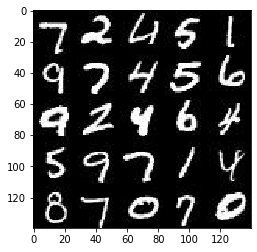

In [3]:
show_n_images = 25
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray');

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

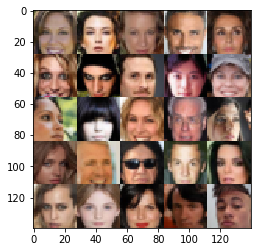

In [4]:
show_n_images = 25
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'));

In [5]:
epochs = 30
batch_size = 64
z_dim = 200
rand_seed = np.random.uniform(-1,1,(1,z_dim))
out_channel_dim = 1
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
g_opt = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.5)
d_opt = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.5)
fakes = []

In [6]:
def train_gan(generator, discriminator, batch_inputs):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        z_sample=np.random.uniform(-1,1,(batch_size,z_dim))
        g_output = generator(z_sample, training=True)
        d_fake_output, d_fake_logits = discriminator(g_output, training=True)
        d_real_output, d_real_logits = discriminator(batch_inputs, training=True)
        g_loss = generator_loss(d_fake_logits, d_fake_output)
        d_loss = discriminator_loss_fake(d_fake_logits, d_fake_output) 
        d_loss += discriminator_loss_real(d_real_logits, d_real_output)
        
    return g_loss, d_loss, gen_tape.gradient(g_loss, generator.trainable_variables), disc_tape.gradient(d_loss, discriminator.trainable_variables)

In [6]:
generator = Generator(out_channel_dim)
discriminator = Discriminator()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Step: 10,         Gen. Loss: 0.3813304305076599,         Dis. Loss: 1.516978144645691
Step: 20,         Gen. Loss: 0.7408855557441711,         Dis. Loss: 1.0852437019348145
Step: 30,         Gen. Loss: 0.9462151527404785,         Dis. Loss: 0.9118138551712036
Step: 40,         Gen. Loss: 0.844191312789917,         Dis. Loss: 1.0234532356262207
Step: 50,         Gen. Loss: 0.8783549070358276,         Dis. Loss: 1.2302184104919434
Step: 60,         Gen. Loss: 1.0071842670440674,         Dis. Loss: 1.19204

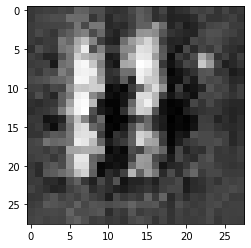

Step: 510,         Gen. Loss: 1.8576349020004272,         Dis. Loss: 0.3751898407936096
Step: 520,         Gen. Loss: 1.3504762649536133,         Dis. Loss: 0.6146347522735596
Step: 530,         Gen. Loss: 1.9736354351043701,         Dis. Loss: 0.4612319767475128
Step: 540,         Gen. Loss: 1.9250831604003906,         Dis. Loss: 0.30437248945236206
Step: 550,         Gen. Loss: 1.6841257810592651,         Dis. Loss: 0.4860560894012451
Step: 560,         Gen. Loss: 2.0015692710876465,         Dis. Loss: 0.4054965674877167
Step: 570,         Gen. Loss: 1.4150866270065308,         Dis. Loss: 0.5143958330154419
Step: 580,         Gen. Loss: 1.6837730407714844,         Dis. Loss: 0.45274287462234497
Step: 590,         Gen. Loss: 1.3211688995361328,         Dis. Loss: 0.6224272847175598
Step: 600,         Gen. Loss: 1.5415449142456055,         Dis. Loss: 0.47787195444107056
Step: 610,         Gen. Loss: 1.607129454612732,         Dis. Loss: 0.5324325561523438
Step: 620,         Gen. Loss: 

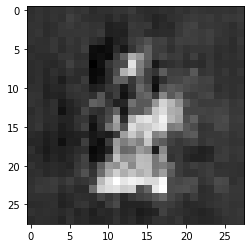

Step: 1010,         Gen. Loss: 2.036550998687744,         Dis. Loss: 0.4039144515991211
Step: 1020,         Gen. Loss: 2.411431074142456,         Dis. Loss: 0.34275609254837036
Step: 1030,         Gen. Loss: 2.4109175205230713,         Dis. Loss: 0.3436824679374695
Step: 1040,         Gen. Loss: 2.11568021774292,         Dis. Loss: 0.2752353847026825
Step: 1050,         Gen. Loss: 2.4819321632385254,         Dis. Loss: 0.22708052396774292
Step: 1060,         Gen. Loss: 2.4009382724761963,         Dis. Loss: 0.16091914474964142
Step: 1070,         Gen. Loss: 2.2177586555480957,         Dis. Loss: 0.2671329975128174
Step: 1080,         Gen. Loss: 2.4056224822998047,         Dis. Loss: 0.25833654403686523
Step: 1090,         Gen. Loss: 2.1513113975524902,         Dis. Loss: 0.245648592710495
Step: 1100,         Gen. Loss: 1.9622761011123657,         Dis. Loss: 0.31418871879577637
Step: 1110,         Gen. Loss: 1.872307538986206,         Dis. Loss: 0.2813758850097656
Step: 1120,         Ge

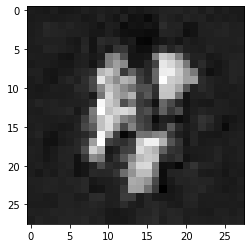

Step: 1510,         Gen. Loss: 1.7768020629882812,         Dis. Loss: 0.24418608844280243
Step: 1520,         Gen. Loss: 2.3062033653259277,         Dis. Loss: 0.24090854823589325
Step: 1530,         Gen. Loss: 2.444395065307617,         Dis. Loss: 0.21779847145080566
Step: 1540,         Gen. Loss: 2.2064080238342285,         Dis. Loss: 0.1884056031703949
Step: 1550,         Gen. Loss: 2.219006061553955,         Dis. Loss: 0.19951938092708588
Step: 1560,         Gen. Loss: 2.6645374298095703,         Dis. Loss: 0.20560193061828613
Step: 1570,         Gen. Loss: 2.6168360710144043,         Dis. Loss: 0.1277730017900467
Step: 1580,         Gen. Loss: 2.7706141471862793,         Dis. Loss: 0.11487091332674026
Step: 1590,         Gen. Loss: 2.723374843597412,         Dis. Loss: 0.12533214688301086
Step: 1600,         Gen. Loss: 2.8611350059509277,         Dis. Loss: 0.1310097575187683
Step: 1610,         Gen. Loss: 3.153127431869507,         Dis. Loss: 0.09475067257881165
Step: 1620,      

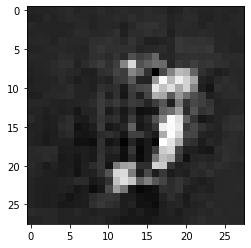

Step: 2010,         Gen. Loss: 2.6767916679382324,         Dis. Loss: 0.1985318660736084
Step: 2020,         Gen. Loss: 2.41121506690979,         Dis. Loss: 0.20418739318847656
Step: 2030,         Gen. Loss: 3.2873802185058594,         Dis. Loss: 0.12717144191265106
Step: 2040,         Gen. Loss: 2.4817655086517334,         Dis. Loss: 0.17049862444400787
Step: 2050,         Gen. Loss: 3.259042978286743,         Dis. Loss: 0.0752001404762268
Step: 2060,         Gen. Loss: 3.2878851890563965,         Dis. Loss: 0.0664803758263588
Step: 2070,         Gen. Loss: 2.839383125305176,         Dis. Loss: 0.08760091662406921
Step: 2080,         Gen. Loss: 2.9439010620117188,         Dis. Loss: 0.15259477496147156
Step: 2090,         Gen. Loss: 2.945040702819824,         Dis. Loss: 0.1726192831993103
Step: 2100,         Gen. Loss: 2.842068910598755,         Dis. Loss: 0.10057764500379562
Step: 2110,         Gen. Loss: 2.796152114868164,         Dis. Loss: 0.1494140326976776
Step: 2120,         Ge

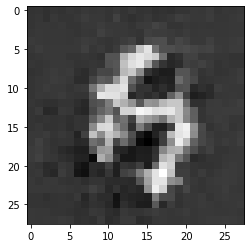

Step: 2510,         Gen. Loss: 2.489555835723877,         Dis. Loss: 0.12989288568496704
Step: 2520,         Gen. Loss: 2.444586753845215,         Dis. Loss: 0.1223088949918747
Step: 2530,         Gen. Loss: 1.8673769235610962,         Dis. Loss: 0.18375305831432343
Step: 2540,         Gen. Loss: 2.622203826904297,         Dis. Loss: 0.12418422847986221
Step: 2550,         Gen. Loss: 3.023620128631592,         Dis. Loss: 0.18374323844909668
Step: 2560,         Gen. Loss: 3.1218929290771484,         Dis. Loss: 0.09190400689840317
Step: 2570,         Gen. Loss: 3.9610180854797363,         Dis. Loss: 0.23942093551158905
Step: 2580,         Gen. Loss: 3.6908435821533203,         Dis. Loss: 0.1385650485754013
Step: 2590,         Gen. Loss: 3.3855948448181152,         Dis. Loss: 0.10609033703804016
Step: 2600,         Gen. Loss: 3.01786208152771,         Dis. Loss: 0.11583182960748672
Step: 2610,         Gen. Loss: 3.8879029750823975,         Dis. Loss: 0.19126467406749725
Step: 2620,       

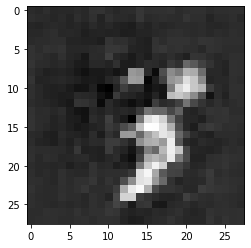

Step: 3010,         Gen. Loss: 2.696492910385132,         Dis. Loss: 0.12702280282974243
Step: 3020,         Gen. Loss: 3.2985727787017822,         Dis. Loss: 0.05793005973100662
Step: 3030,         Gen. Loss: 2.910327911376953,         Dis. Loss: 0.08063717186450958
Step: 3040,         Gen. Loss: 4.004819869995117,         Dis. Loss: 0.047823041677474976
Step: 3050,         Gen. Loss: 4.408358573913574,         Dis. Loss: 0.040762290358543396
Step: 3060,         Gen. Loss: 3.438124895095825,         Dis. Loss: 0.0585906021296978
Step: 3070,         Gen. Loss: 3.43363618850708,         Dis. Loss: 0.07565368711948395
Step: 3080,         Gen. Loss: 3.232069969177246,         Dis. Loss: 0.07572824507951736
Step: 3090,         Gen. Loss: 3.1629862785339355,         Dis. Loss: 0.09320814907550812
Step: 3100,         Gen. Loss: 2.924802780151367,         Dis. Loss: 0.07857091724872589
Step: 3110,         Gen. Loss: 4.253791809082031,         Dis. Loss: 0.11801866441965103
Step: 3120,        

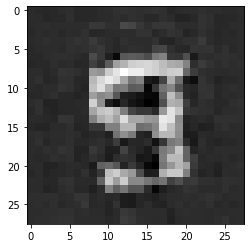

Step: 3510,         Gen. Loss: 3.6112093925476074,         Dis. Loss: 0.05553729832172394
Step: 3520,         Gen. Loss: 3.5237672328948975,         Dis. Loss: 0.06274926662445068
Step: 3530,         Gen. Loss: 3.8067495822906494,         Dis. Loss: 0.06214851886034012
Step: 3540,         Gen. Loss: 4.0676164627075195,         Dis. Loss: 0.05450502783060074
Step: 3550,         Gen. Loss: 3.7969298362731934,         Dis. Loss: 0.05347050726413727
Step: 3560,         Gen. Loss: 3.8826494216918945,         Dis. Loss: 0.03207144886255264
Step: 3570,         Gen. Loss: 3.8311455249786377,         Dis. Loss: 0.05933821201324463
Step: 3580,         Gen. Loss: 4.061184406280518,         Dis. Loss: 0.05494534224271774
Step: 3590,         Gen. Loss: 4.187081813812256,         Dis. Loss: 0.0691966563463211
Step: 3600,         Gen. Loss: 4.10124397277832,         Dis. Loss: 0.04499375820159912
Step: 3610,         Gen. Loss: 2.6005945205688477,         Dis. Loss: 0.09756983816623688
Step: 3620,    

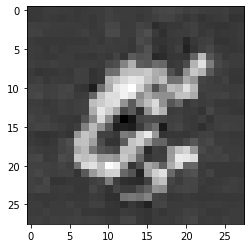

Step: 4010,         Gen. Loss: 3.7232367992401123,         Dis. Loss: 0.06577735394239426
Step: 4020,         Gen. Loss: 3.5728912353515625,         Dis. Loss: 0.04073874652385712
Step: 4030,         Gen. Loss: 4.017928123474121,         Dis. Loss: 0.09165335446596146
Step: 4040,         Gen. Loss: 3.4508490562438965,         Dis. Loss: 0.03936033695936203
Step: 4050,         Gen. Loss: 4.409952640533447,         Dis. Loss: 0.018805602565407753
Step: 4060,         Gen. Loss: 3.9219398498535156,         Dis. Loss: 0.028957854956388474
Step: 4070,         Gen. Loss: 3.947483777999878,         Dis. Loss: 0.04305361211299896
Step: 4080,         Gen. Loss: 4.874480247497559,         Dis. Loss: 0.056315332651138306
Step: 4090,         Gen. Loss: 4.27431583404541,         Dis. Loss: 0.04904840886592865
Step: 4100,         Gen. Loss: 3.092059373855591,         Dis. Loss: 0.06700684875249863
Step: 4110,         Gen. Loss: 3.6718318462371826,         Dis. Loss: 0.04184599965810776
Step: 4120,   

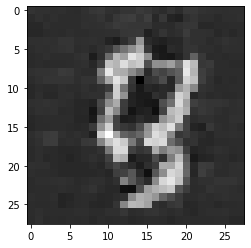

Step: 4510,         Gen. Loss: 3.760903835296631,         Dis. Loss: 0.029443401843309402
Step: 4520,         Gen. Loss: 3.793525457382202,         Dis. Loss: 0.05313419923186302
Step: 4530,         Gen. Loss: 4.5679450035095215,         Dis. Loss: 0.0358799509704113
Step: 4540,         Gen. Loss: 3.741694450378418,         Dis. Loss: 0.030340198427438736
Step: 4550,         Gen. Loss: 3.9709227085113525,         Dis. Loss: 0.10093268752098083
Step: 4560,         Gen. Loss: 3.8974547386169434,         Dis. Loss: 0.07915985584259033
Step: 4570,         Gen. Loss: 4.315700054168701,         Dis. Loss: 0.027679698541760445
Step: 4580,         Gen. Loss: 3.4087066650390625,         Dis. Loss: 0.055375758558511734
Step: 4590,         Gen. Loss: 4.337705612182617,         Dis. Loss: 0.02965383231639862
Step: 4600,         Gen. Loss: 4.341068744659424,         Dis. Loss: 0.0243157297372818
Step: 4610,         Gen. Loss: 4.211271286010742,         Dis. Loss: 0.03733687102794647
Step: 4620,    

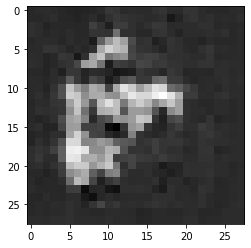

Step: 5010,         Gen. Loss: 4.8613176345825195,         Dis. Loss: 0.019961193203926086
Step: 5020,         Gen. Loss: 4.090160369873047,         Dis. Loss: 0.019681043922901154
Step: 5030,         Gen. Loss: 3.8254668712615967,         Dis. Loss: 0.03459818661212921
Step: 5040,         Gen. Loss: 5.02956485748291,         Dis. Loss: 0.02585267648100853
Step: 5050,         Gen. Loss: 4.234866619110107,         Dis. Loss: 0.0232510045170784
Step: 5060,         Gen. Loss: 4.478745937347412,         Dis. Loss: 0.019803479313850403
Step: 5070,         Gen. Loss: 4.294529438018799,         Dis. Loss: 0.03631089627742767
Step: 5080,         Gen. Loss: 4.472169399261475,         Dis. Loss: 0.02557823807001114
Step: 5090,         Gen. Loss: 4.018402099609375,         Dis. Loss: 0.052936896681785583
Step: 5100,         Gen. Loss: 4.195935249328613,         Dis. Loss: 0.039527252316474915
Step: 5110,         Gen. Loss: 4.895890235900879,         Dis. Loss: 0.055896878242492676
Step: 5120,    

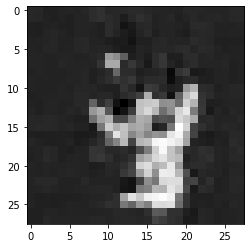

Step: 5510,         Gen. Loss: 5.129594802856445,         Dis. Loss: 0.024234293028712273
Step: 5520,         Gen. Loss: 4.931201934814453,         Dis. Loss: 0.014265392906963825
Step: 5530,         Gen. Loss: 4.902861595153809,         Dis. Loss: 0.016183599829673767
Step: 5540,         Gen. Loss: 4.922881126403809,         Dis. Loss: 0.012976981699466705
Step: 5550,         Gen. Loss: 4.540119171142578,         Dis. Loss: 0.017185624688863754
Step: 5560,         Gen. Loss: 4.485926628112793,         Dis. Loss: 0.04315551742911339
Step: 5570,         Gen. Loss: 4.531716823577881,         Dis. Loss: 0.0255588386207819
Step: 5580,         Gen. Loss: 4.859992027282715,         Dis. Loss: 0.03962688520550728
Step: 5590,         Gen. Loss: 4.050785064697266,         Dis. Loss: 0.05873115360736847
Step: 5600,         Gen. Loss: 3.943326711654663,         Dis. Loss: 0.033963002264499664
Step: 5610,         Gen. Loss: 5.069486618041992,         Dis. Loss: 0.15075738728046417
Step: 5620,     

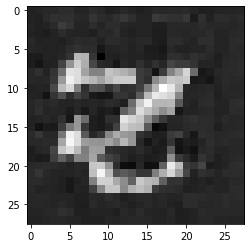

Step: 6010,         Gen. Loss: 4.905786514282227,         Dis. Loss: 0.0400921031832695
Step: 6020,         Gen. Loss: 5.393380165100098,         Dis. Loss: 0.013586405664682388
Step: 6030,         Gen. Loss: 5.297613143920898,         Dis. Loss: 0.00876807700842619
Step: 6040,         Gen. Loss: 4.695353031158447,         Dis. Loss: 0.01562933810055256
Step: 6050,         Gen. Loss: 4.812016010284424,         Dis. Loss: 0.03088287264108658
Step: 6060,         Gen. Loss: 4.636061668395996,         Dis. Loss: 0.014138265512883663
Step: 6070,         Gen. Loss: 4.416208267211914,         Dis. Loss: 0.03111856058239937
Step: 6080,         Gen. Loss: 4.601548671722412,         Dis. Loss: 0.015030560083687305
Step: 6090,         Gen. Loss: 4.296246528625488,         Dis. Loss: 0.0205557681620121
Step: 6100,         Gen. Loss: 4.342217445373535,         Dis. Loss: 0.02442927286028862
Step: 6110,         Gen. Loss: 5.003868103027344,         Dis. Loss: 0.024985726922750473
Step: 6120,        

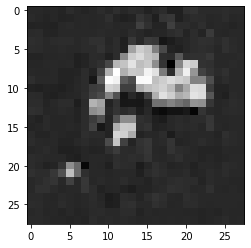

Step: 6510,         Gen. Loss: 4.541239261627197,         Dis. Loss: 0.013521997258067131
Step: 6520,         Gen. Loss: 5.148952007293701,         Dis. Loss: 0.018812313675880432
Step: 6530,         Gen. Loss: 5.210391998291016,         Dis. Loss: 0.012093741446733475
Step: 6540,         Gen. Loss: 5.557868957519531,         Dis. Loss: 0.009063096717000008
Step: 6550,         Gen. Loss: 5.685943603515625,         Dis. Loss: 0.007315963972359896
Step: 6560,         Gen. Loss: 6.012841701507568,         Dis. Loss: 0.003907020669430494
Step: 6570,         Gen. Loss: 6.112386703491211,         Dis. Loss: 0.009338762611150742
Step: 6580,         Gen. Loss: 6.756135940551758,         Dis. Loss: 0.004282077774405479
Step: 6590,         Gen. Loss: 6.322873115539551,         Dis. Loss: 0.004402211867272854
Step: 6600,         Gen. Loss: 5.871763706207275,         Dis. Loss: 0.003624875331297517
Step: 6610,         Gen. Loss: 5.742112636566162,         Dis. Loss: 0.004702426493167877
Step: 6620

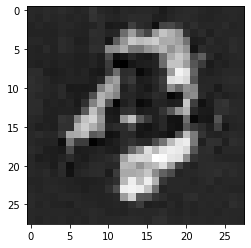

Step: 7010,         Gen. Loss: 5.270088195800781,         Dis. Loss: 0.01953236572444439
Step: 7020,         Gen. Loss: 3.002333402633667,         Dis. Loss: 0.062304217368364334
Step: 7030,         Gen. Loss: 4.741143226623535,         Dis. Loss: 0.02147643081843853
Step: 7040,         Gen. Loss: 5.469310283660889,         Dis. Loss: 0.008002223446965218
Step: 7050,         Gen. Loss: 5.342476844787598,         Dis. Loss: 0.007534002885222435
Step: 7060,         Gen. Loss: 5.095821380615234,         Dis. Loss: 0.00685993954539299
Step: 7070,         Gen. Loss: 4.968375205993652,         Dis. Loss: 0.030885890126228333
Step: 7080,         Gen. Loss: 5.790432929992676,         Dis. Loss: 0.0065923272632062435
Step: 7090,         Gen. Loss: 5.642120361328125,         Dis. Loss: 0.005742117762565613
Step: 7100,         Gen. Loss: 4.598040580749512,         Dis. Loss: 0.014711759984493256
Step: 7110,         Gen. Loss: 5.08506965637207,         Dis. Loss: 0.014009582810103893
Step: 7120,  

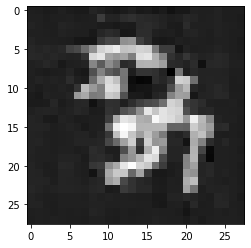

Step: 7510,         Gen. Loss: 5.143863677978516,         Dis. Loss: 0.0077309077605605125
Step: 7520,         Gen. Loss: 5.2876176834106445,         Dis. Loss: 0.00817953422665596
Step: 7530,         Gen. Loss: 5.240594387054443,         Dis. Loss: 0.006841296795755625
Step: 7540,         Gen. Loss: 5.145098686218262,         Dis. Loss: 0.014986022375524044
Step: 7550,         Gen. Loss: 4.8852057456970215,         Dis. Loss: 0.011881738901138306
Step: 7560,         Gen. Loss: 4.743279457092285,         Dis. Loss: 0.01374480128288269
Step: 7570,         Gen. Loss: 21.970203399658203,         Dis. Loss: 1.5575086820263095e-07
Step: 7580,         Gen. Loss: 5.476912498474121,         Dis. Loss: 0.004247106146067381
Step: 7590,         Gen. Loss: 4.0198140144348145,         Dis. Loss: 0.05654437094926834
Step: 7600,         Gen. Loss: 4.141755104064941,         Dis. Loss: 0.06677127629518509
Step: 7610,         Gen. Loss: 4.334074974060059,         Dis. Loss: 0.06302962452173233
Step: 76

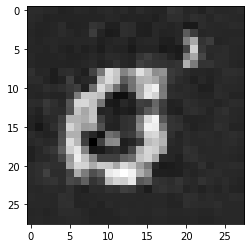

Step: 8010,         Gen. Loss: 3.9604172706604004,         Dis. Loss: 0.028946008533239365
Step: 8020,         Gen. Loss: 5.039594650268555,         Dis. Loss: 0.012845293618738651
Step: 8030,         Gen. Loss: 5.231822967529297,         Dis. Loss: 0.00986387487500906
Step: 8040,         Gen. Loss: 5.000767707824707,         Dis. Loss: 0.007984353229403496
Step: 8050,         Gen. Loss: 5.605099201202393,         Dis. Loss: 0.0071452828124165535
Step: 8060,         Gen. Loss: 5.242597579956055,         Dis. Loss: 0.011576570570468903
Step: 8070,         Gen. Loss: 4.6336846351623535,         Dis. Loss: 0.030856525525450706
Step: 8080,         Gen. Loss: 4.654229640960693,         Dis. Loss: 0.04705572500824928
Step: 8090,         Gen. Loss: 4.957752227783203,         Dis. Loss: 0.029844559729099274
Step: 8100,         Gen. Loss: 4.668427467346191,         Dis. Loss: 0.014089872129261494
Step: 8110,         Gen. Loss: 4.827729225158691,         Dis. Loss: 0.041863225400447845
Step: 812

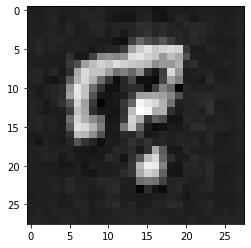

Step: 8510,         Gen. Loss: 5.225976943969727,         Dis. Loss: 0.014025111682713032
Step: 8520,         Gen. Loss: 5.235119342803955,         Dis. Loss: 0.047157756984233856
Step: 8530,         Gen. Loss: 5.557852745056152,         Dis. Loss: 0.006357421167194843
Step: 8540,         Gen. Loss: 5.271409034729004,         Dis. Loss: 0.006922386586666107
Step: 8550,         Gen. Loss: 5.577699661254883,         Dis. Loss: 0.0067297122441232204
Step: 8560,         Gen. Loss: 4.819430351257324,         Dis. Loss: 0.01267683133482933
Step: 8570,         Gen. Loss: 5.445050239562988,         Dis. Loss: 0.007173486985266209
Step: 8580,         Gen. Loss: 4.862730026245117,         Dis. Loss: 0.03419061005115509
Step: 8590,         Gen. Loss: 5.328256607055664,         Dis. Loss: 0.006165875121951103
Step: 8600,         Gen. Loss: 4.812765121459961,         Dis. Loss: 0.013785391114652157
Step: 8610,         Gen. Loss: 5.80703067779541,         Dis. Loss: 0.007210203446447849
Step: 8620, 

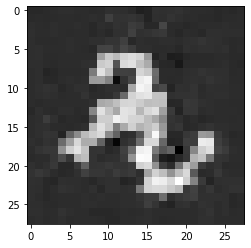

Step: 9010,         Gen. Loss: 5.404630661010742,         Dis. Loss: 0.006053897552192211
Step: 9020,         Gen. Loss: 4.700628757476807,         Dis. Loss: 0.009607041254639626
Step: 9030,         Gen. Loss: 5.267173767089844,         Dis. Loss: 0.009958451613783836
Step: 9040,         Gen. Loss: 5.29903507232666,         Dis. Loss: 0.011466925963759422
Step: 9050,         Gen. Loss: 4.850130558013916,         Dis. Loss: 0.03065088391304016
Step: 9060,         Gen. Loss: 4.7010087966918945,         Dis. Loss: 0.024772709235548973
Step: 9070,         Gen. Loss: 5.92871618270874,         Dis. Loss: 0.012865075841546059
Step: 9080,         Gen. Loss: 5.1168437004089355,         Dis. Loss: 0.014871956780552864
Step: 9090,         Gen. Loss: 5.7568039894104,         Dis. Loss: 0.010653138160705566
Step: 9100,         Gen. Loss: 5.385595798492432,         Dis. Loss: 0.011569535359740257
Step: 9110,         Gen. Loss: 5.215903282165527,         Dis. Loss: 0.05105403810739517
Step: 9120,   

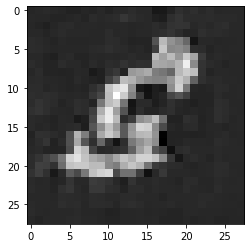

Step: 9510,         Gen. Loss: 4.918929576873779,         Dis. Loss: 0.008416146039962769
Step: 9520,         Gen. Loss: 4.947725296020508,         Dis. Loss: 0.009409815073013306
Step: 9530,         Gen. Loss: 4.5631914138793945,         Dis. Loss: 0.02096480317413807
Step: 9540,         Gen. Loss: 5.4493608474731445,         Dis. Loss: 0.008175507187843323
Step: 9550,         Gen. Loss: 5.661510944366455,         Dis. Loss: 0.026315465569496155
Step: 9560,         Gen. Loss: 6.087467670440674,         Dis. Loss: 0.008814607746899128
Step: 9570,         Gen. Loss: 5.416015625,         Dis. Loss: 0.0053601558320224285
Step: 9580,         Gen. Loss: 3.4661567211151123,         Dis. Loss: 0.03430308774113655
Step: 9590,         Gen. Loss: 5.6591644287109375,         Dis. Loss: 0.004702314734458923
Step: 9600,         Gen. Loss: 8.252994537353516,         Dis. Loss: 0.007741875015199184
Step: 9610,         Gen. Loss: 5.5449604988098145,         Dis. Loss: 0.0077809481881558895
Step: 9620,

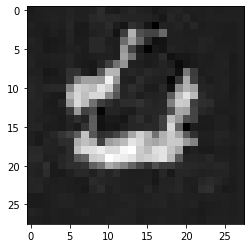

Step: 10010,         Gen. Loss: 10.89521598815918,         Dis. Loss: 0.018307238817214966
Step: 10020,         Gen. Loss: 5.328967571258545,         Dis. Loss: 0.007489864714443684
Step: 10030,         Gen. Loss: 5.629819869995117,         Dis. Loss: 0.027246925979852676
Step: 10040,         Gen. Loss: 4.906949996948242,         Dis. Loss: 0.011177183128893375
Step: 10050,         Gen. Loss: 4.650416851043701,         Dis. Loss: 0.016988219693303108
Step: 10060,         Gen. Loss: 2.8251588344573975,         Dis. Loss: 0.06353527307510376
Step: 10070,         Gen. Loss: 19.956708908081055,         Dis. Loss: 1.078549861907959
Step: 10080,         Gen. Loss: 15.249149322509766,         Dis. Loss: 0.0004355626297183335
Step: 10090,         Gen. Loss: 4.931260108947754,         Dis. Loss: 0.020426273345947266
Step: 10100,         Gen. Loss: 5.442821502685547,         Dis. Loss: 0.006064275745302439
Step: 10110,         Gen. Loss: 4.760082244873047,         Dis. Loss: 0.025738108903169632

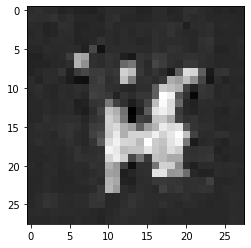

Step: 10510,         Gen. Loss: 6.092921257019043,         Dis. Loss: 0.0035523194819688797
Step: 10520,         Gen. Loss: 5.604066848754883,         Dis. Loss: 0.007339498959481716
Step: 10530,         Gen. Loss: 5.639834403991699,         Dis. Loss: 0.004844566807150841
Step: 10540,         Gen. Loss: 4.5037841796875,         Dis. Loss: 0.013850952498614788
Step: 10550,         Gen. Loss: 6.259036064147949,         Dis. Loss: 0.005020867567509413
Step: 10560,         Gen. Loss: 5.633049964904785,         Dis. Loss: 0.016114013269543648
Step: 10570,         Gen. Loss: 4.4251298904418945,         Dis. Loss: 0.013658867217600346
Step: 10580,         Gen. Loss: 5.845134735107422,         Dis. Loss: 0.006772714667022228
Step: 10590,         Gen. Loss: 5.406117916107178,         Dis. Loss: 0.011295468546450138
Step: 10600,         Gen. Loss: 6.29014253616333,         Dis. Loss: 0.0035945523995906115
Step: 10610,         Gen. Loss: 5.893652439117432,         Dis. Loss: 0.024984177201986313

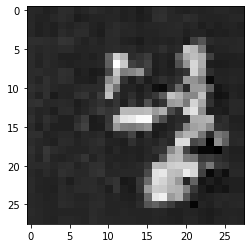

Step: 11010,         Gen. Loss: 6.153496265411377,         Dis. Loss: 0.022698184475302696
Step: 11020,         Gen. Loss: 6.233580112457275,         Dis. Loss: 0.0027112471871078014
Step: 11030,         Gen. Loss: 5.871334075927734,         Dis. Loss: 0.003969524055719376
Step: 11040,         Gen. Loss: 6.248871803283691,         Dis. Loss: 0.005117467604577541
Step: 11050,         Gen. Loss: 6.351759433746338,         Dis. Loss: 0.012711377814412117
Step: 11060,         Gen. Loss: 6.05966329574585,         Dis. Loss: 0.004812777973711491
Step: 11070,         Gen. Loss: 5.75489616394043,         Dis. Loss: 0.004147327970713377
Step: 11080,         Gen. Loss: 6.219254493713379,         Dis. Loss: 0.01087752915918827
Step: 11090,         Gen. Loss: 6.557361602783203,         Dis. Loss: 0.0030406746082007885
Step: 11100,         Gen. Loss: 5.731199741363525,         Dis. Loss: 0.012398171238601208
Step: 11110,         Gen. Loss: 5.7062458992004395,         Dis. Loss: 0.011265736073255539

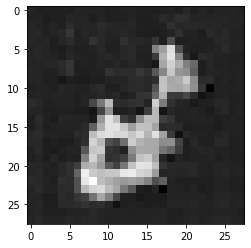

Step: 11510,         Gen. Loss: 5.933032512664795,         Dis. Loss: 0.0049903057515621185
Step: 11520,         Gen. Loss: 5.56178092956543,         Dis. Loss: 0.017060942947864532
Step: 11530,         Gen. Loss: 9.001253128051758,         Dis. Loss: 0.014370875433087349
Step: 11540,         Gen. Loss: 5.841816425323486,         Dis. Loss: 0.003616895992308855
Step: 11550,         Gen. Loss: 6.319207191467285,         Dis. Loss: 0.0031428560614585876
Step: 11560,         Gen. Loss: 5.3025712966918945,         Dis. Loss: 0.031005123630166054
Step: 11570,         Gen. Loss: 0.0041854968294501305,         Dis. Loss: 5.5199480056762695
Step: 11580,         Gen. Loss: 5.939976215362549,         Dis. Loss: 0.002669555600732565
Step: 11590,         Gen. Loss: 4.904454231262207,         Dis. Loss: 0.013232692144811153
Step: 11600,         Gen. Loss: 5.77327823638916,         Dis. Loss: 0.14063958823680878
Step: 11610,         Gen. Loss: 5.707089900970459,         Dis. Loss: 0.0375671088695526

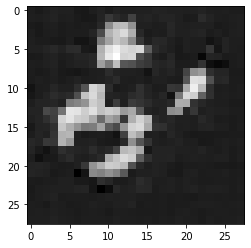

Step: 12010,         Gen. Loss: 5.877070426940918,         Dis. Loss: 0.004074049647897482
Step: 12020,         Gen. Loss: 5.86529541015625,         Dis. Loss: 0.006798739545047283
Step: 12030,         Gen. Loss: 5.748221397399902,         Dis. Loss: 0.0042534638196229935
Step: 12040,         Gen. Loss: 5.053038597106934,         Dis. Loss: 0.008883528411388397
Step: 12050,         Gen. Loss: 6.077390193939209,         Dis. Loss: 0.003166624577715993
Step: 12060,         Gen. Loss: 6.752711296081543,         Dis. Loss: 0.0075984494760632515
Step: 12070,         Gen. Loss: 5.490357398986816,         Dis. Loss: 0.004509701393544674
Step: 12080,         Gen. Loss: 5.235790252685547,         Dis. Loss: 0.00664207199588418
Step: 12090,         Gen. Loss: 5.5982489585876465,         Dis. Loss: 0.004090556874871254
Step: 12100,         Gen. Loss: 5.764636993408203,         Dis. Loss: 0.007470601238310337
Step: 12110,         Gen. Loss: 6.485414505004883,         Dis. Loss: 0.00451948214322328

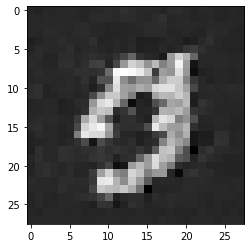

Step: 12510,         Gen. Loss: 6.096433639526367,         Dis. Loss: 0.00406152568757534
Step: 12520,         Gen. Loss: 4.779166221618652,         Dis. Loss: 0.014598770067095757
Step: 12530,         Gen. Loss: 5.077370643615723,         Dis. Loss: 0.02861676923930645
Step: 12540,         Gen. Loss: 5.038688659667969,         Dis. Loss: 0.010029453784227371
Step: 12550,         Gen. Loss: 5.72346830368042,         Dis. Loss: 0.012193642556667328
Step: 12560,         Gen. Loss: 5.8400397300720215,         Dis. Loss: 0.012259007431566715
Step: 12570,         Gen. Loss: 5.711627006530762,         Dis. Loss: 0.007723301183432341
Step: 12580,         Gen. Loss: 5.351158142089844,         Dis. Loss: 0.02183227613568306
Step: 12590,         Gen. Loss: 5.852208614349365,         Dis. Loss: 0.00434440653771162
Step: 12600,         Gen. Loss: 5.762528419494629,         Dis. Loss: 0.0043524340726435184
Step: 12610,         Gen. Loss: 4.946258068084717,         Dis. Loss: 0.00827882532030344
Ste

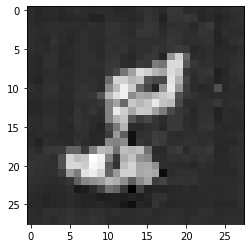

Step: 13010,         Gen. Loss: 3.620344400405884,         Dis. Loss: 0.028940711170434952
Step: 13020,         Gen. Loss: 5.478135108947754,         Dis. Loss: 0.022156599909067154
Step: 13030,         Gen. Loss: 5.794751167297363,         Dis. Loss: 0.03545306622982025
Step: 13040,         Gen. Loss: 5.439757347106934,         Dis. Loss: 0.005540909245610237
Step: 13050,         Gen. Loss: 5.524753093719482,         Dis. Loss: 0.04362742602825165
Step: 13060,         Gen. Loss: 4.8155364990234375,         Dis. Loss: 0.00861260574311018
Step: 13070,         Gen. Loss: 5.701864242553711,         Dis. Loss: 0.010700712911784649
Step: 13080,         Gen. Loss: 5.928350448608398,         Dis. Loss: 0.004761116113513708
Step: 13090,         Gen. Loss: 5.355714797973633,         Dis. Loss: 0.023568671196699142
Step: 13100,         Gen. Loss: 6.677353858947754,         Dis. Loss: 0.004296950064599514
Step: 13110,         Gen. Loss: 6.281035900115967,         Dis. Loss: 0.006666577886790037
S

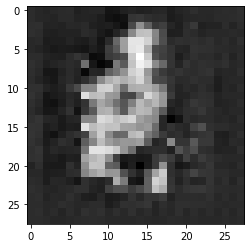

Step: 13510,         Gen. Loss: 3.8035926818847656,         Dis. Loss: 0.0463404506444931
Step: 13520,         Gen. Loss: 4.742809772491455,         Dis. Loss: 0.03966818004846573
Step: 13530,         Gen. Loss: 4.174931049346924,         Dis. Loss: 0.04111790657043457
Step: 13540,         Gen. Loss: 3.970583438873291,         Dis. Loss: 0.027765780687332153
Step: 13550,         Gen. Loss: 4.540417194366455,         Dis. Loss: 0.039247479289770126
Step: 13560,         Gen. Loss: 4.603414535522461,         Dis. Loss: 0.012219322845339775
Step: 13570,         Gen. Loss: 4.515352249145508,         Dis. Loss: 0.01744779944419861
Step: 13580,         Gen. Loss: 4.283685684204102,         Dis. Loss: 0.017349259927868843
Step: 13590,         Gen. Loss: 5.135654926300049,         Dis. Loss: 0.03056565672159195
Step: 13600,         Gen. Loss: 4.589176177978516,         Dis. Loss: 0.010977908037602901
Step: 13610,         Gen. Loss: 5.399066925048828,         Dis. Loss: 0.025010528042912483
Step

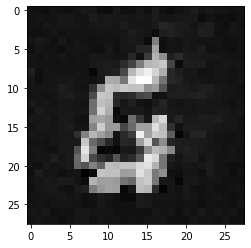

Step: 14010,         Gen. Loss: 5.233468055725098,         Dis. Loss: 0.01730123534798622
Step: 14020,         Gen. Loss: 5.919029235839844,         Dis. Loss: 0.007101499475538731
Step: 14030,         Gen. Loss: 5.383823394775391,         Dis. Loss: 0.013828139752149582
Step: 14040,         Gen. Loss: 5.314591407775879,         Dis. Loss: 0.016667531803250313
Step: 14050,         Gen. Loss: 5.21912956237793,         Dis. Loss: 0.009233837947249413
Step: 14060,         Gen. Loss: 4.4404778480529785,         Dis. Loss: 0.0248218085616827
Step: 14070,         Gen. Loss: 5.98828125,         Dis. Loss: 0.01879928633570671
Step: 14080,         Gen. Loss: 5.18292236328125,         Dis. Loss: 0.009181949310004711
Step: 14090,         Gen. Loss: 4.78599739074707,         Dis. Loss: 0.014944514259696007
Step: 14100,         Gen. Loss: 6.294197082519531,         Dis. Loss: 0.02466903068125248
Step: 14110,         Gen. Loss: 5.409560203552246,         Dis. Loss: 0.0057062613777816296
Step: 14120,

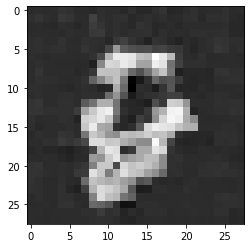

Step: 14510,         Gen. Loss: 4.59214973449707,         Dis. Loss: 0.015345469117164612
Step: 14520,         Gen. Loss: 5.5903425216674805,         Dis. Loss: 0.004135324619710445
Step: 14530,         Gen. Loss: 5.5429887771606445,         Dis. Loss: 0.022934554144740105
Step: 14540,         Gen. Loss: 5.856337070465088,         Dis. Loss: 0.0035158521495759487
Step: 14550,         Gen. Loss: 5.27985954284668,         Dis. Loss: 0.013026485219597816
Step: 14560,         Gen. Loss: 5.778329849243164,         Dis. Loss: 0.005339084193110466
Step: 14570,         Gen. Loss: 5.173483371734619,         Dis. Loss: 0.00639351038262248
Step: 14580,         Gen. Loss: 4.319766521453857,         Dis. Loss: 0.02100636437535286
Step: 14590,         Gen. Loss: 6.032469749450684,         Dis. Loss: 0.014013920910656452
Step: 14600,         Gen. Loss: 6.81845760345459,         Dis. Loss: 0.00211241003125906
Step: 14610,         Gen. Loss: 5.830516815185547,         Dis. Loss: 0.006072034128010273
St

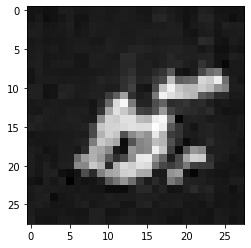

Step: 15010,         Gen. Loss: 5.196224212646484,         Dis. Loss: 0.006267827935516834
Step: 15020,         Gen. Loss: 6.228079795837402,         Dis. Loss: 0.01569807529449463
Step: 15030,         Gen. Loss: 5.293490409851074,         Dis. Loss: 0.005407360848039389
Step: 15040,         Gen. Loss: 5.121522903442383,         Dis. Loss: 0.006775323301553726
Step: 15050,         Gen. Loss: 5.1594696044921875,         Dis. Loss: 0.006846005562692881
Step: 15060,         Gen. Loss: 10.896644592285156,         Dis. Loss: 0.10872527211904526
Step: 15070,         Gen. Loss: 5.949663162231445,         Dis. Loss: 0.0035702851600944996
Step: 15080,         Gen. Loss: 5.075146675109863,         Dis. Loss: 0.018373697996139526
Step: 15090,         Gen. Loss: 5.043569564819336,         Dis. Loss: 0.02583279088139534
Step: 15100,         Gen. Loss: 5.014678955078125,         Dis. Loss: 0.02926180511713028
Step: 15110,         Gen. Loss: 4.380627155303955,         Dis. Loss: 0.01915731094777584
S

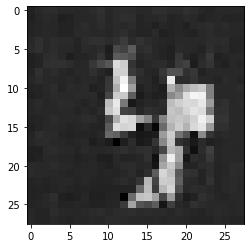

Step: 15510,         Gen. Loss: 6.298166275024414,         Dis. Loss: 0.0047065140679478645
Step: 15520,         Gen. Loss: 6.359001636505127,         Dis. Loss: 0.0035556736402213573
Step: 15530,         Gen. Loss: 5.656022071838379,         Dis. Loss: 0.007844911888241768
Step: 15540,         Gen. Loss: 5.796996116638184,         Dis. Loss: 0.005013790912926197
Step: 15550,         Gen. Loss: 6.423635482788086,         Dis. Loss: 0.001832913956604898
Step: 15560,         Gen. Loss: 5.266018867492676,         Dis. Loss: 0.005475836805999279
Step: 15570,         Gen. Loss: 6.715823173522949,         Dis. Loss: 0.0033372212201356888
Step: 15580,         Gen. Loss: 5.405074119567871,         Dis. Loss: 0.03613559156656265
Step: 15590,         Gen. Loss: 5.326394081115723,         Dis. Loss: 0.0056550828740000725
Step: 15600,         Gen. Loss: 6.378396987915039,         Dis. Loss: 0.0035619058180600405
Step: 15610,         Gen. Loss: 12.78722858428955,         Dis. Loss: 0.00031961331842

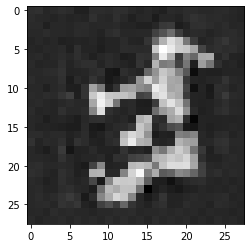

Step: 16010,         Gen. Loss: 4.976419448852539,         Dis. Loss: 0.011436467058956623
Step: 16020,         Gen. Loss: 5.499066352844238,         Dis. Loss: 0.008081158623099327
Step: 16030,         Gen. Loss: 5.242359161376953,         Dis. Loss: 0.03907380998134613
Step: 16040,         Gen. Loss: 5.478411674499512,         Dis. Loss: 0.008004864677786827
Step: 16050,         Gen. Loss: 5.748894214630127,         Dis. Loss: 0.009652367793023586
Step: 16060,         Gen. Loss: 4.975362777709961,         Dis. Loss: 0.011410679668188095
Step: 16070,         Gen. Loss: 4.947443008422852,         Dis. Loss: 0.009365271776914597
Step: 16080,         Gen. Loss: 4.7783427238464355,         Dis. Loss: 0.023117447271943092
Step: 16090,         Gen. Loss: 5.154265880584717,         Dis. Loss: 0.02804655022919178
Step: 16100,         Gen. Loss: 5.206534385681152,         Dis. Loss: 0.03849482163786888
Step: 16110,         Gen. Loss: 4.733329772949219,         Dis. Loss: 0.020066991448402405
S

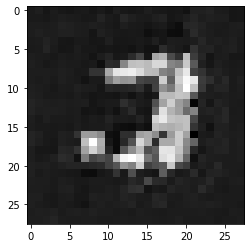

Step: 16510,         Gen. Loss: 4.656309127807617,         Dis. Loss: 0.012870868667960167
Step: 16520,         Gen. Loss: 4.093883514404297,         Dis. Loss: 0.021891143172979355
Step: 16530,         Gen. Loss: 6.008576393127441,         Dis. Loss: 0.007398632355034351
Step: 16540,         Gen. Loss: 5.264122009277344,         Dis. Loss: 0.008453276008367538
Step: 16550,         Gen. Loss: 5.362877368927002,         Dis. Loss: 0.020133083686232567
Step: 16560,         Gen. Loss: 5.115291595458984,         Dis. Loss: 0.006526971235871315
Step: 16570,         Gen. Loss: 4.906597137451172,         Dis. Loss: 0.031393758952617645
Step: 16580,         Gen. Loss: 5.014939308166504,         Dis. Loss: 0.013629872351884842
Step: 16590,         Gen. Loss: 5.371102333068848,         Dis. Loss: 0.007748003117740154
Step: 16600,         Gen. Loss: 5.684416770935059,         Dis. Loss: 0.0405697263777256
Step: 16610,         Gen. Loss: 5.883510112762451,         Dis. Loss: 0.004375514108687639
S

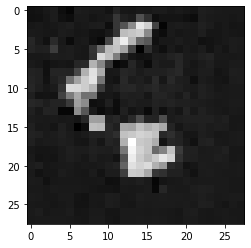

Step: 17010,         Gen. Loss: 7.22501277923584,         Dis. Loss: 0.0013351973611861467
Step: 17020,         Gen. Loss: 7.279314994812012,         Dis. Loss: 0.01289401575922966
Step: 17030,         Gen. Loss: 6.666018962860107,         Dis. Loss: 0.002050199545919895
Step: 17040,         Gen. Loss: 5.691094875335693,         Dis. Loss: 0.005408921744674444
Step: 17050,         Gen. Loss: 7.330439567565918,         Dis. Loss: 0.0009720198577269912
Step: 17060,         Gen. Loss: 5.738259792327881,         Dis. Loss: 0.004790775943547487
Step: 17070,         Gen. Loss: 7.023021697998047,         Dis. Loss: 0.07513450086116791
Step: 17080,         Gen. Loss: 6.074639320373535,         Dis. Loss: 0.008056310936808586
Step: 17090,         Gen. Loss: 5.777318954467773,         Dis. Loss: 0.003982927184551954
Step: 17100,         Gen. Loss: 5.54778528213501,         Dis. Loss: 0.0041586244478821754
Step: 17110,         Gen. Loss: 6.430386543273926,         Dis. Loss: 0.0029803570359945297

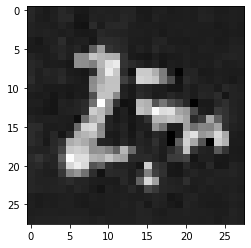

Step: 17510,         Gen. Loss: 11.710430145263672,         Dis. Loss: 0.00016799331933725625
Step: 17520,         Gen. Loss: 7.639381408691406,         Dis. Loss: 0.0005042037228122354
Step: 17530,         Gen. Loss: 6.992025375366211,         Dis. Loss: 0.0012383407447487116
Step: 17540,         Gen. Loss: 7.327200889587402,         Dis. Loss: 0.0010869383113458753
Step: 17550,         Gen. Loss: 7.262125015258789,         Dis. Loss: 0.006079901475459337
Step: 17560,         Gen. Loss: 7.303688049316406,         Dis. Loss: 0.0015732753090560436
Step: 17570,         Gen. Loss: 7.277017116546631,         Dis. Loss: 0.000911377021111548
Step: 17580,         Gen. Loss: 6.771382808685303,         Dis. Loss: 0.0013017186429351568
Step: 17590,         Gen. Loss: 6.276605606079102,         Dis. Loss: 0.002069280482828617
Step: 17600,         Gen. Loss: 7.291698932647705,         Dis. Loss: 0.0007366274949163198
Step: 17610,         Gen. Loss: 6.844482421875,         Dis. Loss: 0.001232275506

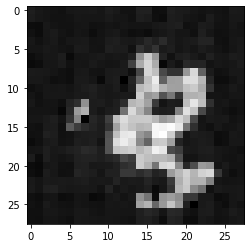

Step: 18010,         Gen. Loss: 6.960526943206787,         Dis. Loss: 0.012638232670724392
Step: 18020,         Gen. Loss: 5.902635097503662,         Dis. Loss: 0.0030579257290810347
Step: 18030,         Gen. Loss: 7.430937767028809,         Dis. Loss: 0.0021042046137154102
Step: 18040,         Gen. Loss: 5.982037544250488,         Dis. Loss: 0.0029278758447617292
Step: 18050,         Gen. Loss: 6.380799770355225,         Dis. Loss: 0.0035982890985906124
Step: 18060,         Gen. Loss: 6.116126537322998,         Dis. Loss: 0.004565830808132887
Step: 18070,         Gen. Loss: 6.068962574005127,         Dis. Loss: 0.003481203457340598
Step: 18080,         Gen. Loss: 10.95151424407959,         Dis. Loss: 0.02397800423204899
Step: 18090,         Gen. Loss: 6.523435592651367,         Dis. Loss: 0.00297860661521554
Step: 18100,         Gen. Loss: 5.503686904907227,         Dis. Loss: 0.005870834458619356
Step: 18110,         Gen. Loss: 5.969005584716797,         Dis. Loss: 0.0161355845630168

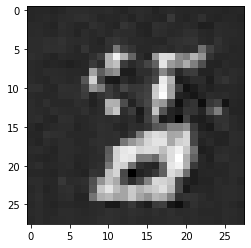

Step: 18510,         Gen. Loss: 6.840731620788574,         Dis. Loss: 0.0017772559076547623
Step: 18520,         Gen. Loss: 7.388466835021973,         Dis. Loss: 0.0033424762077629566
Step: 18530,         Gen. Loss: 6.049287796020508,         Dis. Loss: 0.002988718682900071
Step: 18540,         Gen. Loss: 6.431850433349609,         Dis. Loss: 0.0029869270510971546
Step: 18550,         Gen. Loss: 5.799891471862793,         Dis. Loss: 0.003363979049026966
Step: 18560,         Gen. Loss: 8.803388595581055,         Dis. Loss: 0.006402371916919947
Step: 18570,         Gen. Loss: 5.976535797119141,         Dis. Loss: 0.0038997349329292774
Step: 18580,         Gen. Loss: 5.959420204162598,         Dis. Loss: 0.017671983689069748
Step: 18590,         Gen. Loss: 5.28314208984375,         Dis. Loss: 0.006195619702339172
Step: 18600,         Gen. Loss: 6.189533233642578,         Dis. Loss: 0.01574700139462948
Step: 18610,         Gen. Loss: 6.764424800872803,         Dis. Loss: 0.0022420766763389

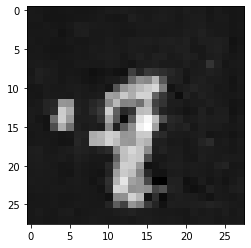

Step: 19010,         Gen. Loss: 6.962554931640625,         Dis. Loss: 0.011397323571145535
Step: 19020,         Gen. Loss: 7.096896171569824,         Dis. Loss: 0.0010681642452254891
Step: 19030,         Gen. Loss: 6.672623634338379,         Dis. Loss: 0.001539218588732183
Step: 19040,         Gen. Loss: 6.721091270446777,         Dis. Loss: 0.014753908850252628
Step: 19050,         Gen. Loss: 6.580015182495117,         Dis. Loss: 0.002390120644122362
Step: 19060,         Gen. Loss: 6.601506233215332,         Dis. Loss: 0.005618223454803228
Step: 19070,         Gen. Loss: 6.594790935516357,         Dis. Loss: 0.0015823154244571924
Step: 19080,         Gen. Loss: 6.784473419189453,         Dis. Loss: 0.0017369597917422652
Step: 19090,         Gen. Loss: 6.883453369140625,         Dis. Loss: 0.0034189687576144934
Step: 19100,         Gen. Loss: 3.15396785736084,         Dis. Loss: 0.04453130066394806
Step: 19110,         Gen. Loss: 5.947765350341797,         Dis. Loss: 0.0027021418791264

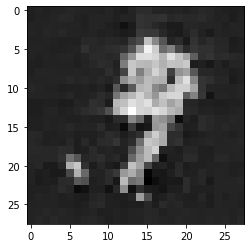

Step: 19510,         Gen. Loss: 5.676477432250977,         Dis. Loss: 0.006970380432903767
Step: 19520,         Gen. Loss: 5.042148590087891,         Dis. Loss: 0.010610252618789673
Step: 19530,         Gen. Loss: 4.91099739074707,         Dis. Loss: 0.029526114463806152
Step: 19540,         Gen. Loss: 5.925642013549805,         Dis. Loss: 0.007826969027519226
Step: 19550,         Gen. Loss: 4.954965591430664,         Dis. Loss: 0.03192702680826187
Step: 19560,         Gen. Loss: 5.5825042724609375,         Dis. Loss: 0.013968825340270996
Step: 19570,         Gen. Loss: 5.621236801147461,         Dis. Loss: 0.023355241864919662
Step: 19580,         Gen. Loss: 5.06691837310791,         Dis. Loss: 0.00807082001119852
Step: 19590,         Gen. Loss: 4.555358409881592,         Dis. Loss: 0.021858323365449905
Step: 19600,         Gen. Loss: 5.996879577636719,         Dis. Loss: 0.005414462182670832
Step: 19610,         Gen. Loss: 5.201972484588623,         Dis. Loss: 0.01124277338385582
Ste

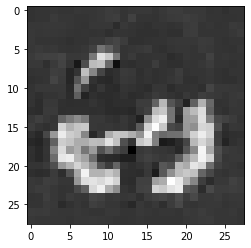

Step: 20010,         Gen. Loss: 5.528327465057373,         Dis. Loss: 0.025956815108656883
Step: 20020,         Gen. Loss: 6.58726167678833,         Dis. Loss: 0.0020753236021846533
Step: 20030,         Gen. Loss: 6.719862461090088,         Dis. Loss: 0.0013101213844493032
Step: 20040,         Gen. Loss: 7.430300235748291,         Dis. Loss: 0.006757939700037241
Step: 20050,         Gen. Loss: 5.8485870361328125,         Dis. Loss: 0.003048816230148077
Step: 20060,         Gen. Loss: 6.467715263366699,         Dis. Loss: 0.0016869084211066365
Step: 20070,         Gen. Loss: 6.646575927734375,         Dis. Loss: 0.0024802633561193943
Step: 20080,         Gen. Loss: 6.583496570587158,         Dis. Loss: 0.004465113393962383
Step: 20090,         Gen. Loss: 6.039436340332031,         Dis. Loss: 0.003512087743729353
Step: 20100,         Gen. Loss: 6.724059104919434,         Dis. Loss: 0.0018991611432284117
Step: 20110,         Gen. Loss: 6.523464679718018,         Dis. Loss: 0.0015842226566

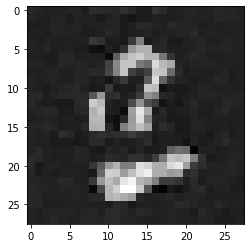

Step: 20510,         Gen. Loss: 4.974143028259277,         Dis. Loss: 0.01177385076880455
Step: 20520,         Gen. Loss: 5.333577632904053,         Dis. Loss: 0.005293294787406921
Step: 20530,         Gen. Loss: 5.847662925720215,         Dis. Loss: 0.007786515634506941
Step: 20540,         Gen. Loss: 5.088508129119873,         Dis. Loss: 0.008043881505727768
Step: 20550,         Gen. Loss: 5.858710289001465,         Dis. Loss: 0.023654025048017502
Step: 20560,         Gen. Loss: 4.728423595428467,         Dis. Loss: 0.01043802872300148
Step: 20570,         Gen. Loss: 6.01493501663208,         Dis. Loss: 0.003977831918746233
Step: 20580,         Gen. Loss: 6.363089561462402,         Dis. Loss: 0.0023295627906918526
Step: 20590,         Gen. Loss: 6.27395486831665,         Dis. Loss: 0.0030549089424312115
Step: 20600,         Gen. Loss: 6.191173076629639,         Dis. Loss: 0.003299369942396879
Step: 20610,         Gen. Loss: 5.347879409790039,         Dis. Loss: 0.007999664172530174
S

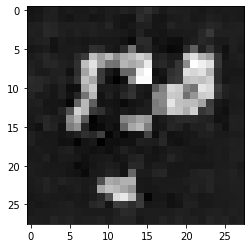

Step: 21010,         Gen. Loss: 5.143908500671387,         Dis. Loss: 0.0063108764588832855
Step: 21020,         Gen. Loss: 4.338593006134033,         Dis. Loss: 0.014696365222334862
Step: 21030,         Gen. Loss: 5.421547889709473,         Dis. Loss: 0.004967065062373877
Step: 21040,         Gen. Loss: 6.467487335205078,         Dis. Loss: 0.004913379438221455
Step: 21050,         Gen. Loss: 5.959470748901367,         Dis. Loss: 0.0032958753872662783
Step: 21060,         Gen. Loss: 5.929521083831787,         Dis. Loss: 0.009936811402440071
Step: 21070,         Gen. Loss: 6.366415977478027,         Dis. Loss: 0.00327493529766798
Step: 21080,         Gen. Loss: 5.704984664916992,         Dis. Loss: 0.01356122549623251
Step: 21090,         Gen. Loss: 4.502805709838867,         Dis. Loss: 0.01988375186920166
Step: 21100,         Gen. Loss: 5.261261940002441,         Dis. Loss: 0.006509662140160799
Step: 21110,         Gen. Loss: 5.6924309730529785,         Dis. Loss: 0.008510001935064793

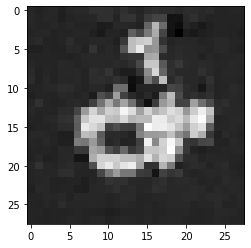

Step: 21510,         Gen. Loss: 5.607956886291504,         Dis. Loss: 0.006075049750506878
Step: 21520,         Gen. Loss: 3.9392752647399902,         Dis. Loss: 0.024024251848459244
Step: 21530,         Gen. Loss: 4.536440849304199,         Dis. Loss: 0.01122080348432064
Step: 21540,         Gen. Loss: 4.830864906311035,         Dis. Loss: 0.009053824469447136
Step: 21550,         Gen. Loss: 6.002969741821289,         Dis. Loss: 0.0033634917344897985
Step: 21560,         Gen. Loss: 5.1447014808654785,         Dis. Loss: 0.02324197068810463
Step: 21570,         Gen. Loss: 7.586994171142578,         Dis. Loss: 0.021155035123229027
Step: 21580,         Gen. Loss: 5.2379631996154785,         Dis. Loss: 0.012485504150390625
Step: 21590,         Gen. Loss: 5.871272563934326,         Dis. Loss: 0.009649810381233692
Step: 21600,         Gen. Loss: 6.009497165679932,         Dis. Loss: 0.034850142896175385
Step: 21610,         Gen. Loss: 6.195052146911621,         Dis. Loss: 0.0083668213337659

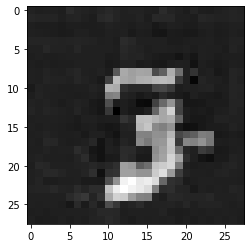

Step: 22010,         Gen. Loss: 6.591650485992432,         Dis. Loss: 0.001846667961217463
Step: 22020,         Gen. Loss: 6.482412338256836,         Dis. Loss: 0.0034772492945194244
Step: 22030,         Gen. Loss: 5.829265594482422,         Dis. Loss: 0.005212804302573204
Step: 22040,         Gen. Loss: 5.183870315551758,         Dis. Loss: 0.01093320082873106
Step: 22050,         Gen. Loss: 5.685442924499512,         Dis. Loss: 0.030008690431714058
Step: 22060,         Gen. Loss: 5.930059432983398,         Dis. Loss: 0.0036775609478354454
Step: 22070,         Gen. Loss: 6.139718532562256,         Dis. Loss: 0.005529956892132759
Step: 22080,         Gen. Loss: 5.3244781494140625,         Dis. Loss: 0.011232268996536732
Step: 22090,         Gen. Loss: 6.0770649909973145,         Dis. Loss: 0.0033060552086681128
Step: 22100,         Gen. Loss: 5.473589897155762,         Dis. Loss: 0.005232570692896843
Step: 22110,         Gen. Loss: 5.541881084442139,         Dis. Loss: 0.00429190695285

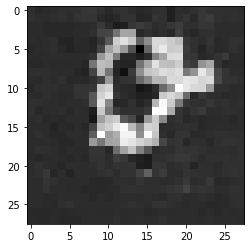

Step: 22510,         Gen. Loss: 6.156195163726807,         Dis. Loss: 0.0032652514055371284
Step: 22520,         Gen. Loss: 6.513631343841553,         Dis. Loss: 0.007954604923725128
Step: 22530,         Gen. Loss: 5.895585536956787,         Dis. Loss: 0.003575175069272518
Step: 22540,         Gen. Loss: 6.13856315612793,         Dis. Loss: 0.005240336991846561
Step: 22550,         Gen. Loss: 6.302646636962891,         Dis. Loss: 0.0027356562204658985
Step: 22560,         Gen. Loss: 6.876832008361816,         Dis. Loss: 0.005104869604110718
Step: 22570,         Gen. Loss: 6.4823150634765625,         Dis. Loss: 0.004844413138926029
Step: 22580,         Gen. Loss: 6.125715255737305,         Dis. Loss: 0.006666980683803558
Step: 22590,         Gen. Loss: 5.626778602600098,         Dis. Loss: 0.006483828648924828
Step: 22600,         Gen. Loss: 6.4698567390441895,         Dis. Loss: 0.002347964094951749
Step: 22610,         Gen. Loss: 6.073686122894287,         Dis. Loss: 0.004616652615368

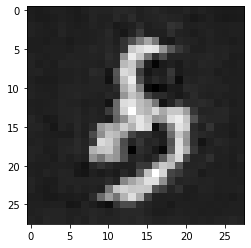

Step: 23010,         Gen. Loss: 5.050439834594727,         Dis. Loss: 0.014404885470867157
Step: 23020,         Gen. Loss: 5.286914825439453,         Dis. Loss: 0.005296515300869942
Step: 23030,         Gen. Loss: 4.93247127532959,         Dis. Loss: 0.010424374602735043
Step: 23040,         Gen. Loss: 14.205589294433594,         Dis. Loss: 0.02230217307806015
Step: 23050,         Gen. Loss: 5.247082233428955,         Dis. Loss: 0.00534907728433609
Step: 23060,         Gen. Loss: 6.987153053283691,         Dis. Loss: 0.001857681549154222
Step: 23070,         Gen. Loss: 6.6560893058776855,         Dis. Loss: 0.003501374274492264
Step: 23080,         Gen. Loss: 6.957314968109131,         Dis. Loss: 0.005106830038130283
Step: 23090,         Gen. Loss: 6.2909111976623535,         Dis. Loss: 0.008790256455540657
Step: 23100,         Gen. Loss: 6.02223014831543,         Dis. Loss: 0.004855644423514605
Step: 23110,         Gen. Loss: 4.942288398742676,         Dis. Loss: 0.011800514534115791


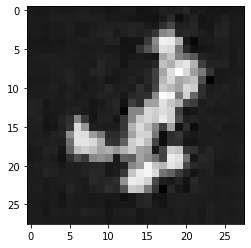

Step: 23510,         Gen. Loss: 6.647283554077148,         Dis. Loss: 0.00280141388066113
Step: 23520,         Gen. Loss: 5.856301307678223,         Dis. Loss: 0.007706662639975548
Step: 23530,         Gen. Loss: 5.45252799987793,         Dis. Loss: 0.005215787328779697
Step: 23540,         Gen. Loss: 6.420977592468262,         Dis. Loss: 0.003409174270927906
Step: 23550,         Gen. Loss: 5.313263416290283,         Dis. Loss: 0.05050334706902504
Step: 23560,         Gen. Loss: 5.066949367523193,         Dis. Loss: 0.006888494826853275
Step: 23570,         Gen. Loss: 5.107812881469727,         Dis. Loss: 0.006448566913604736
Step: 23580,         Gen. Loss: 4.726675033569336,         Dis. Loss: 0.009117855690419674
Step: 23590,         Gen. Loss: 6.549381256103516,         Dis. Loss: 0.011202163062989712
Step: 23600,         Gen. Loss: 4.981592178344727,         Dis. Loss: 0.007693997584283352
Step: 23610,         Gen. Loss: 6.281939506530762,         Dis. Loss: 0.0022120545618236065
S

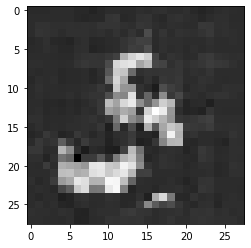

Step: 24010,         Gen. Loss: 6.667506217956543,         Dis. Loss: 0.0014633073005825281
Step: 24020,         Gen. Loss: 6.78947639465332,         Dis. Loss: 0.010148510336875916
Step: 24030,         Gen. Loss: 5.351215362548828,         Dis. Loss: 0.004863668233156204
Step: 24040,         Gen. Loss: 7.371397972106934,         Dis. Loss: 0.0008045415743254125
Step: 24050,         Gen. Loss: 6.3153395652771,         Dis. Loss: 0.0024402125272899866
Step: 24060,         Gen. Loss: 5.4623565673828125,         Dis. Loss: 0.0066197216510772705
Step: 24070,         Gen. Loss: 5.743383884429932,         Dis. Loss: 0.024290673434734344
Step: 24080,         Gen. Loss: 7.306614875793457,         Dis. Loss: 0.012945865280926228
Step: 24090,         Gen. Loss: 5.128714084625244,         Dis. Loss: 0.00689405994489789
Step: 24100,         Gen. Loss: 6.359038352966309,         Dis. Loss: 0.007206825073808432
Step: 24110,         Gen. Loss: 2.995793104171753,         Dis. Loss: 0.05152721703052521

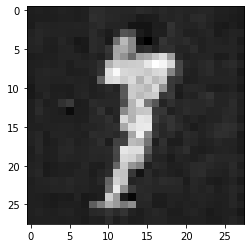

Step: 24510,         Gen. Loss: 6.002867698669434,         Dis. Loss: 0.009167505428195
Step: 24520,         Gen. Loss: 5.849141597747803,         Dis. Loss: 0.02766365185379982
Step: 24530,         Gen. Loss: 5.00586462020874,         Dis. Loss: 0.007538604084402323
Step: 24540,         Gen. Loss: 5.197481155395508,         Dis. Loss: 0.008771613240242004
Step: 24550,         Gen. Loss: 6.713616371154785,         Dis. Loss: 0.005676286295056343
Step: 24560,         Gen. Loss: 5.134013652801514,         Dis. Loss: 0.007973970845341682
Step: 24570,         Gen. Loss: 6.895407676696777,         Dis. Loss: 0.0033276425674557686
Step: 24580,         Gen. Loss: 5.602805137634277,         Dis. Loss: 0.005651830229908228
Step: 24590,         Gen. Loss: 5.562546253204346,         Dis. Loss: 0.007811856921762228
Step: 24600,         Gen. Loss: 3.8324484825134277,         Dis. Loss: 0.027189645916223526
Step: 24610,         Gen. Loss: 8.526895523071289,         Dis. Loss: 0.05656317621469498
Ste

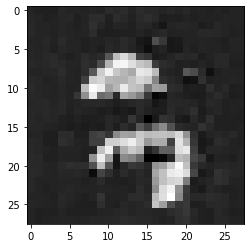

Step: 25010,         Gen. Loss: 6.438117980957031,         Dis. Loss: 0.02653489075601101
Step: 25020,         Gen. Loss: 4.071834564208984,         Dis. Loss: 0.017708931118249893
Step: 25030,         Gen. Loss: 5.996641159057617,         Dis. Loss: 0.0032092775218188763
Step: 25040,         Gen. Loss: 4.709804534912109,         Dis. Loss: 0.009876199997961521
Step: 25050,         Gen. Loss: 4.810122966766357,         Dis. Loss: 0.00834787916392088
Step: 25060,         Gen. Loss: 6.899261474609375,         Dis. Loss: 0.0015590573893859982
Step: 25070,         Gen. Loss: 3.9846458435058594,         Dis. Loss: 0.018981724977493286
Step: 25080,         Gen. Loss: 5.796133995056152,         Dis. Loss: 0.006745493970811367
Step: 25090,         Gen. Loss: 6.140793800354004,         Dis. Loss: 0.022853540256619453
Step: 25100,         Gen. Loss: 6.611093997955322,         Dis. Loss: 0.0023273101542145014
Step: 25110,         Gen. Loss: 6.653992652893066,         Dis. Loss: 0.0092498632147908

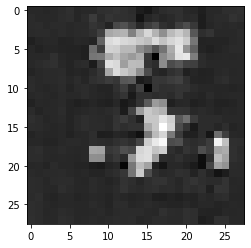

Step: 25510,         Gen. Loss: 7.503032207489014,         Dis. Loss: 0.0016019041649997234
Step: 25520,         Gen. Loss: 6.479776859283447,         Dis. Loss: 0.0018917364068329334
Step: 25530,         Gen. Loss: 8.035110473632812,         Dis. Loss: 0.0012466831831261516
Step: 25540,         Gen. Loss: 5.92404842376709,         Dis. Loss: 0.0027322410605847836
Step: 25550,         Gen. Loss: 7.538227081298828,         Dis. Loss: 0.0007797691505402327
Step: 25560,         Gen. Loss: 6.837520122528076,         Dis. Loss: 0.001197280129417777
Step: 25570,         Gen. Loss: 8.18629264831543,         Dis. Loss: 0.001136451493948698
Step: 25580,         Gen. Loss: 6.097806930541992,         Dis. Loss: 0.002629168564453721
Step: 25590,         Gen. Loss: 6.131338119506836,         Dis. Loss: 0.0025156326591968536
Step: 25600,         Gen. Loss: 7.823325157165527,         Dis. Loss: 0.0005062413401901722
Step: 25610,         Gen. Loss: 7.668255805969238,         Dis. Loss: 0.0051130205392

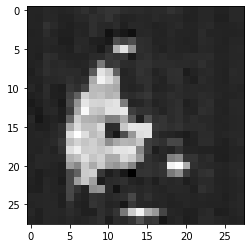

Step: 26010,         Gen. Loss: 6.964216232299805,         Dis. Loss: 0.0011613701935857534
Step: 26020,         Gen. Loss: 6.6676764488220215,         Dis. Loss: 0.002651355229318142
Step: 26030,         Gen. Loss: 7.115696907043457,         Dis. Loss: 0.0011440615635365248
Step: 26040,         Gen. Loss: 7.1305718421936035,         Dis. Loss: 0.0010100287618115544
Step: 26050,         Gen. Loss: 6.862900733947754,         Dis. Loss: 0.010052087716758251
Step: 26060,         Gen. Loss: 6.44744348526001,         Dis. Loss: 0.001987539464607835
Step: 26070,         Gen. Loss: 7.060722351074219,         Dis. Loss: 0.0010482415091246367
Step: 26080,         Gen. Loss: 7.796855449676514,         Dis. Loss: 0.0012231870787218213
Step: 26090,         Gen. Loss: 7.398049354553223,         Dis. Loss: 0.0008550983038730919
Step: 26100,         Gen. Loss: 4.360997200012207,         Dis. Loss: 0.012998153455555439
Step: 26110,         Gen. Loss: 7.096299171447754,         Dis. Loss: 0.00185596768

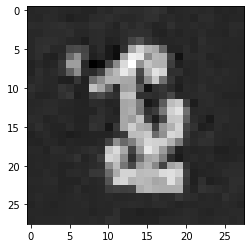

Step: 26510,         Gen. Loss: 3.8332197666168213,         Dis. Loss: 0.028095293790102005
Step: 26520,         Gen. Loss: 5.716720104217529,         Dis. Loss: 0.004265002906322479
Step: 26530,         Gen. Loss: 5.221102714538574,         Dis. Loss: 0.005448830779641867
Step: 26540,         Gen. Loss: 5.897432327270508,         Dis. Loss: 0.003192526986822486
Step: 26550,         Gen. Loss: 5.832333564758301,         Dis. Loss: 0.0037233280017971992
Step: 26560,         Gen. Loss: 5.8663482666015625,         Dis. Loss: 0.003391259117051959
Step: 26570,         Gen. Loss: 5.853174686431885,         Dis. Loss: 0.005413014441728592
Step: 26580,         Gen. Loss: 8.001495361328125,         Dis. Loss: 0.006332505028694868
Step: 26590,         Gen. Loss: 6.616640090942383,         Dis. Loss: 0.0014222718309611082
Step: 26600,         Gen. Loss: 5.402925491333008,         Dis. Loss: 0.005492928437888622
Step: 26610,         Gen. Loss: 5.029980659484863,         Dis. Loss: 0.00679630972445

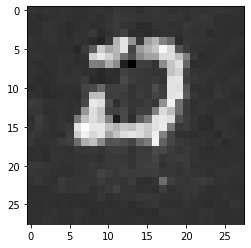

Step: 27010,         Gen. Loss: 6.135827541351318,         Dis. Loss: 0.003003887366503477
Step: 27020,         Gen. Loss: 4.915287017822266,         Dis. Loss: 0.007592149078845978
Step: 27030,         Gen. Loss: 6.265883445739746,         Dis. Loss: 0.0021835032384842634
Step: 27040,         Gen. Loss: 5.982828140258789,         Dis. Loss: 0.002558912616223097
Step: 27050,         Gen. Loss: 6.456787109375,         Dis. Loss: 0.005541324149817228
Step: 27060,         Gen. Loss: 5.429247856140137,         Dis. Loss: 0.00448234099894762
Step: 27070,         Gen. Loss: 7.148862361907959,         Dis. Loss: 0.0010213609784841537
Step: 27080,         Gen. Loss: 6.521817207336426,         Dis. Loss: 0.001521616824902594
Step: 27090,         Gen. Loss: 5.101250171661377,         Dis. Loss: 0.006614706479012966
Step: 27100,         Gen. Loss: 6.141451358795166,         Dis. Loss: 0.0023168986663222313
Step: 27110,         Gen. Loss: 5.1868510246276855,         Dis. Loss: 0.005853265523910522

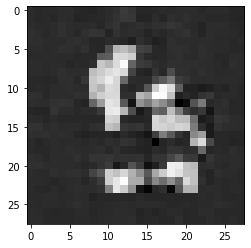

Step: 27510,         Gen. Loss: 5.218238830566406,         Dis. Loss: 0.005782376043498516
Step: 27520,         Gen. Loss: 5.595714092254639,         Dis. Loss: 0.003768358612433076
Step: 27530,         Gen. Loss: 6.976495742797852,         Dis. Loss: 0.0034449759405106306
Step: 27540,         Gen. Loss: 6.510560989379883,         Dis. Loss: 0.0015314571792259812
Step: 27550,         Gen. Loss: 7.950191497802734,         Dis. Loss: 0.0005565275205299258
Step: 27560,         Gen. Loss: 7.88991641998291,         Dis. Loss: 0.00352373905479908
Step: 27570,         Gen. Loss: 6.600789546966553,         Dis. Loss: 0.0014711389085277915
Step: 27580,         Gen. Loss: 6.8624725341796875,         Dis. Loss: 0.0011836171615868807
Step: 27590,         Gen. Loss: 7.001771926879883,         Dis. Loss: 0.001071072882041335
Step: 27600,         Gen. Loss: 6.766505241394043,         Dis. Loss: 0.0021043673623353243
Step: 27610,         Gen. Loss: 7.81436824798584,         Dis. Loss: 0.00041699330904

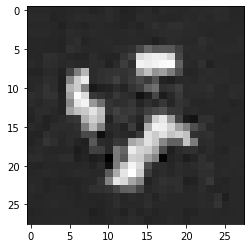

Step: 28010,         Gen. Loss: 6.512319564819336,         Dis. Loss: 0.014107411727309227
Step: 28020,         Gen. Loss: 6.854885101318359,         Dis. Loss: 0.00130116892978549
Step: 28030,         Gen. Loss: 6.6161041259765625,         Dis. Loss: 0.0019227673765271902
Step: 28040,         Gen. Loss: 6.571255683898926,         Dis. Loss: 0.001961271744221449
Step: 28050,         Gen. Loss: 8.005315780639648,         Dis. Loss: 0.0010896200546994805
Step: 28060,         Gen. Loss: 7.589029788970947,         Dis. Loss: 0.004960077814757824
Step: 28070,         Gen. Loss: 6.991710662841797,         Dis. Loss: 0.0011945802252739668
Step: 28080,         Gen. Loss: 7.569990634918213,         Dis. Loss: 0.0009324144921265543
Step: 28090,         Gen. Loss: 5.851840496063232,         Dis. Loss: 0.0030294861644506454
Step: 28100,         Gen. Loss: 6.572066307067871,         Dis. Loss: 0.0014909234596416354
Step: 28110,         Gen. Loss: 5.983494758605957,         Dis. Loss: 0.003217879217

In [7]:
itr = 0
for e in range(epochs):
    for batch_inputs in mnist_dataset.get_batches(batch_size):
        itr+=1
        g_loss, d_loss, g_grad, d_grad = train_gan(generator, discriminator, batch_inputs)
        g_opt.apply_gradients(zip(g_grad, generator.trainable_variables))
        d_opt.apply_gradients(zip(d_grad, discriminator.trainable_variables))
        if itr%10==0:
            print("Step: {},         Gen. Loss: {},         Dis. Loss: {}".format(g_opt.iterations.numpy(), g_loss, d_loss))
        
        if itr%500==0:
            fake = generator(rand_seed)
            pyplot.imshow((fake.numpy()).reshape(28,28, out_channel_dim), cmap='gray')
            pyplot.show()
            fakes.append((fake.numpy()).reshape(28,28, out_channel_dim))

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [33]:
batch_size = 64
z_dim = 100
rand_seed = np.random.uniform(-1,1,(1,z_dim))
learning_rate = 0.001
beta1 = 0.5
out_channel_dim = 3
g_opt = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.5)
d_opt = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.5)
fake_faces = []
epochs = 1
celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))

In [34]:
generator = Generator(out_channel_dim)
discriminator = Discriminator()

Step:    10,         Gen. Loss: 0.1697,         Dis. Loss: 2.7143
Step:    20,         Gen. Loss: 0.3023,         Dis. Loss: 2.2889
Step:    30,         Gen. Loss: 0.4345,         Dis. Loss: 2.1299
Step:    40,         Gen. Loss: 0.5340,         Dis. Loss: 2.2920
Step:    50,         Gen. Loss: 0.6183,         Dis. Loss: 1.9738
Step:    60,         Gen. Loss: 0.8068,         Dis. Loss: 1.6800
Step:    70,         Gen. Loss: 0.7772,         Dis. Loss: 1.5335
Step:    80,         Gen. Loss: 0.9071,         Dis. Loss: 1.5488
Step:    90,         Gen. Loss: 0.9175,         Dis. Loss: 1.6042
Step:   100,         Gen. Loss: 0.9766,         Dis. Loss: 1.4185


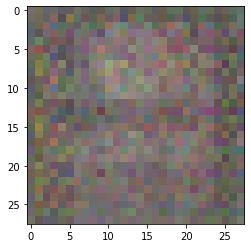

Step:   110,         Gen. Loss: 1.0593,         Dis. Loss: 1.1291
Step:   120,         Gen. Loss: 1.0213,         Dis. Loss: 1.1229
Step:   130,         Gen. Loss: 1.2105,         Dis. Loss: 1.0291
Step:   140,         Gen. Loss: 1.2897,         Dis. Loss: 1.0225
Step:   150,         Gen. Loss: 1.1927,         Dis. Loss: 0.9786
Step:   160,         Gen. Loss: 1.2710,         Dis. Loss: 0.8305
Step:   170,         Gen. Loss: 1.2157,         Dis. Loss: 0.7119
Step:   180,         Gen. Loss: 1.3547,         Dis. Loss: 0.8740
Step:   190,         Gen. Loss: 1.3238,         Dis. Loss: 0.6485
Step:   200,         Gen. Loss: 1.1956,         Dis. Loss: 0.6709


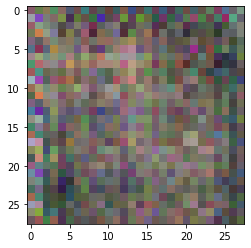

Step:   210,         Gen. Loss: 1.2346,         Dis. Loss: 0.8080
Step:   220,         Gen. Loss: 1.0517,         Dis. Loss: 1.0791
Step:   230,         Gen. Loss: 0.9521,         Dis. Loss: 1.0053
Step:   240,         Gen. Loss: 0.9157,         Dis. Loss: 0.9794
Step:   250,         Gen. Loss: 1.2197,         Dis. Loss: 0.9413
Step:   260,         Gen. Loss: 1.0812,         Dis. Loss: 1.2133
Step:   270,         Gen. Loss: 0.9043,         Dis. Loss: 1.0682
Step:   280,         Gen. Loss: 0.7525,         Dis. Loss: 1.1675
Step:   290,         Gen. Loss: 1.1725,         Dis. Loss: 1.0000
Step:   300,         Gen. Loss: 0.5459,         Dis. Loss: 1.2485


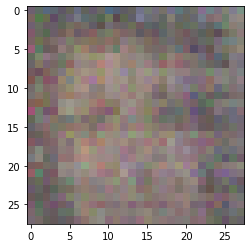

Step:   310,         Gen. Loss: 1.1500,         Dis. Loss: 0.9088
Step:   320,         Gen. Loss: 0.8587,         Dis. Loss: 1.1952
Step:   330,         Gen. Loss: 0.9718,         Dis. Loss: 0.8587
Step:   340,         Gen. Loss: 1.1306,         Dis. Loss: 0.7399
Step:   350,         Gen. Loss: 1.2688,         Dis. Loss: 0.5559
Step:   360,         Gen. Loss: 1.0813,         Dis. Loss: 0.7889
Step:   370,         Gen. Loss: 1.2484,         Dis. Loss: 1.0302
Step:   380,         Gen. Loss: 1.1316,         Dis. Loss: 0.8631
Step:   390,         Gen. Loss: 0.9492,         Dis. Loss: 1.4383
Step:   400,         Gen. Loss: 1.3952,         Dis. Loss: 0.7769


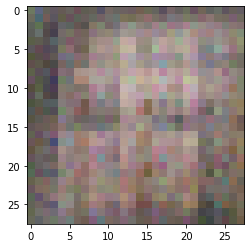

Step:   410,         Gen. Loss: 1.2998,         Dis. Loss: 0.6507
Step:   420,         Gen. Loss: 1.0527,         Dis. Loss: 0.9561
Step:   430,         Gen. Loss: 1.2339,         Dis. Loss: 0.7039
Step:   440,         Gen. Loss: 1.5139,         Dis. Loss: 0.5357
Step:   450,         Gen. Loss: 1.4485,         Dis. Loss: 0.5836
Step:   460,         Gen. Loss: 1.4485,         Dis. Loss: 1.0153
Step:   470,         Gen. Loss: 1.2825,         Dis. Loss: 0.8854
Step:   480,         Gen. Loss: 1.4732,         Dis. Loss: 0.6099
Step:   490,         Gen. Loss: 1.5670,         Dis. Loss: 0.5904
Step:   500,         Gen. Loss: 1.6400,         Dis. Loss: 0.4261


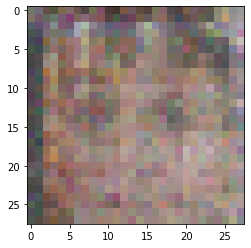

Step:   510,         Gen. Loss: 1.1200,         Dis. Loss: 0.7288
Step:   520,         Gen. Loss: 1.4553,         Dis. Loss: 0.5755
Step:   530,         Gen. Loss: 1.2841,         Dis. Loss: 0.7796
Step:   540,         Gen. Loss: 1.4547,         Dis. Loss: 0.6494
Step:   550,         Gen. Loss: 1.7212,         Dis. Loss: 0.5717
Step:   560,         Gen. Loss: 1.8711,         Dis. Loss: 0.4482
Step:   570,         Gen. Loss: 1.5419,         Dis. Loss: 0.6121
Step:   580,         Gen. Loss: 1.2636,         Dis. Loss: 0.6852
Step:   590,         Gen. Loss: 1.0615,         Dis. Loss: 0.9242
Step:   600,         Gen. Loss: 1.2960,         Dis. Loss: 0.8913


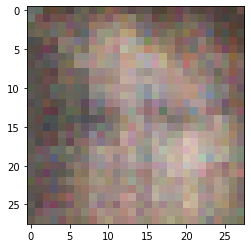

Step:   610,         Gen. Loss: 1.4132,         Dis. Loss: 0.7054
Step:   620,         Gen. Loss: 1.4604,         Dis. Loss: 0.7067
Step:   630,         Gen. Loss: 1.7623,         Dis. Loss: 0.3600
Step:   640,         Gen. Loss: 1.5952,         Dis. Loss: 0.4025
Step:   650,         Gen. Loss: 1.6025,         Dis. Loss: 0.5694
Step:   660,         Gen. Loss: 1.4701,         Dis. Loss: 0.4312
Step:   670,         Gen. Loss: 1.2460,         Dis. Loss: 0.7615
Step:   680,         Gen. Loss: 1.6593,         Dis. Loss: 0.4443
Step:   690,         Gen. Loss: 1.6151,         Dis. Loss: 0.6535
Step:   700,         Gen. Loss: 1.5558,         Dis. Loss: 0.8353


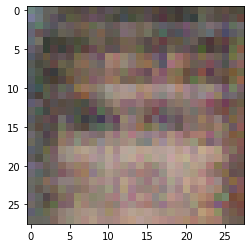

Step:   710,         Gen. Loss: 1.8545,         Dis. Loss: 0.5439
Step:   720,         Gen. Loss: 1.2522,         Dis. Loss: 1.0189
Step:   730,         Gen. Loss: 1.7271,         Dis. Loss: 0.6364
Step:   740,         Gen. Loss: 1.7069,         Dis. Loss: 0.5486
Step:   750,         Gen. Loss: 1.3031,         Dis. Loss: 0.8990
Step:   760,         Gen. Loss: 1.2613,         Dis. Loss: 0.7501
Step:   770,         Gen. Loss: 1.2636,         Dis. Loss: 0.6820
Step:   780,         Gen. Loss: 1.7904,         Dis. Loss: 0.5088
Step:   790,         Gen. Loss: 1.8564,         Dis. Loss: 0.3228
Step:   800,         Gen. Loss: 1.7004,         Dis. Loss: 0.4704


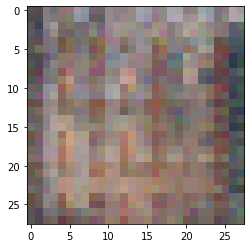

Step:   810,         Gen. Loss: 2.0445,         Dis. Loss: 0.2681
Step:   820,         Gen. Loss: 1.6346,         Dis. Loss: 0.5052
Step:   830,         Gen. Loss: 1.6419,         Dis. Loss: 0.3812
Step:   840,         Gen. Loss: 1.5685,         Dis. Loss: 0.5655
Step:   850,         Gen. Loss: 1.8255,         Dis. Loss: 0.4597
Step:   860,         Gen. Loss: 2.0048,         Dis. Loss: 0.4045
Step:   870,         Gen. Loss: 2.0150,         Dis. Loss: 0.3948
Step:   880,         Gen. Loss: 1.5160,         Dis. Loss: 0.6596
Step:   890,         Gen. Loss: 1.8750,         Dis. Loss: 0.4277
Step:   900,         Gen. Loss: 1.8986,         Dis. Loss: 0.4072


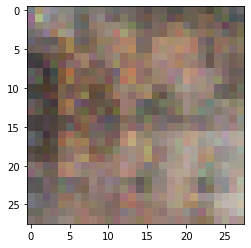

Step:   910,         Gen. Loss: 1.4884,         Dis. Loss: 0.5682
Step:   920,         Gen. Loss: 1.5718,         Dis. Loss: 0.5454
Step:   930,         Gen. Loss: 1.6315,         Dis. Loss: 0.5587
Step:   940,         Gen. Loss: 2.0585,         Dis. Loss: 0.4252
Step:   950,         Gen. Loss: 1.1473,         Dis. Loss: 0.6822
Step:   960,         Gen. Loss: 1.4576,         Dis. Loss: 0.9154
Step:   970,         Gen. Loss: 1.9677,         Dis. Loss: 0.4523
Step:   980,         Gen. Loss: 1.5661,         Dis. Loss: 0.4367
Step:   990,         Gen. Loss: 1.7244,         Dis. Loss: 0.5023
Step:  1000,         Gen. Loss: 2.2604,         Dis. Loss: 0.3059


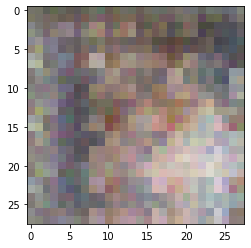

Step:  1010,         Gen. Loss: 1.4727,         Dis. Loss: 0.4601
Step:  1020,         Gen. Loss: 2.1315,         Dis. Loss: 0.3154
Step:  1030,         Gen. Loss: 2.0678,         Dis. Loss: 0.2930
Step:  1040,         Gen. Loss: 1.8131,         Dis. Loss: 0.4209
Step:  1050,         Gen. Loss: 1.4226,         Dis. Loss: 0.8627
Step:  1060,         Gen. Loss: 1.8285,         Dis. Loss: 0.4045
Step:  1070,         Gen. Loss: 1.7510,         Dis. Loss: 0.4513
Step:  1080,         Gen. Loss: 1.7624,         Dis. Loss: 0.3339
Step:  1090,         Gen. Loss: 2.2412,         Dis. Loss: 0.3259
Step:  1100,         Gen. Loss: 1.6830,         Dis. Loss: 0.3148


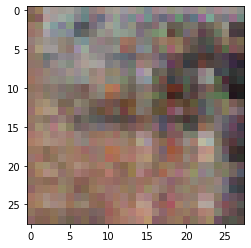

Step:  1110,         Gen. Loss: 1.7349,         Dis. Loss: 0.3528
Step:  1120,         Gen. Loss: 2.0923,         Dis. Loss: 0.2471
Step:  1130,         Gen. Loss: 2.0677,         Dis. Loss: 0.3251
Step:  1140,         Gen. Loss: 1.9485,         Dis. Loss: 0.4314
Step:  1150,         Gen. Loss: 2.2387,         Dis. Loss: 0.4133
Step:  1160,         Gen. Loss: 2.0921,         Dis. Loss: 0.2395
Step:  1170,         Gen. Loss: 1.2623,         Dis. Loss: 0.7967
Step:  1180,         Gen. Loss: 1.4378,         Dis. Loss: 0.5709
Step:  1190,         Gen. Loss: 2.3704,         Dis. Loss: 0.2956
Step:  1200,         Gen. Loss: 2.2751,         Dis. Loss: 0.2414


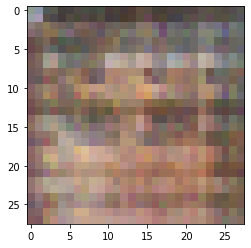

Step:  1210,         Gen. Loss: 2.0266,         Dis. Loss: 0.3040
Step:  1220,         Gen. Loss: 2.1244,         Dis. Loss: 0.3067
Step:  1230,         Gen. Loss: 1.9669,         Dis. Loss: 0.3241
Step:  1240,         Gen. Loss: 1.8557,         Dis. Loss: 0.2830
Step:  1250,         Gen. Loss: 1.3208,         Dis. Loss: 0.4553
Step:  1260,         Gen. Loss: 1.9469,         Dis. Loss: 0.5243
Step:  1270,         Gen. Loss: 2.3045,         Dis. Loss: 0.1762
Step:  1280,         Gen. Loss: 2.5433,         Dis. Loss: 0.1941
Step:  1290,         Gen. Loss: 1.5600,         Dis. Loss: 0.5164
Step:  1300,         Gen. Loss: 2.2013,         Dis. Loss: 0.2883


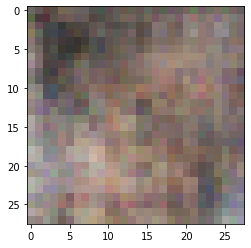

Step:  1310,         Gen. Loss: 2.0667,         Dis. Loss: 0.3823
Step:  1320,         Gen. Loss: 2.3282,         Dis. Loss: 0.1965
Step:  1330,         Gen. Loss: 2.1801,         Dis. Loss: 0.3209
Step:  1340,         Gen. Loss: 1.8757,         Dis. Loss: 0.3104
Step:  1350,         Gen. Loss: 2.1419,         Dis. Loss: 0.3150
Step:  1360,         Gen. Loss: 1.8610,         Dis. Loss: 0.3591
Step:  1370,         Gen. Loss: 2.0594,         Dis. Loss: 0.2127
Step:  1380,         Gen. Loss: 2.7562,         Dis. Loss: 0.1442
Step:  1390,         Gen. Loss: 2.4629,         Dis. Loss: 0.2175
Step:  1400,         Gen. Loss: 2.2818,         Dis. Loss: 0.3660


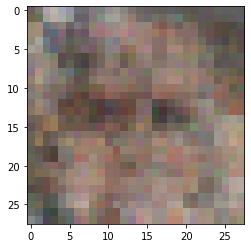

Step:  1410,         Gen. Loss: 2.2209,         Dis. Loss: 0.3955
Step:  1420,         Gen. Loss: 2.3041,         Dis. Loss: 0.2421
Step:  1430,         Gen. Loss: 1.9577,         Dis. Loss: 0.3024
Step:  1440,         Gen. Loss: 2.0995,         Dis. Loss: 0.3477
Step:  1450,         Gen. Loss: 2.2592,         Dis. Loss: 0.3660
Step:  1460,         Gen. Loss: 2.1758,         Dis. Loss: 0.2144
Step:  1470,         Gen. Loss: 1.8892,         Dis. Loss: 0.3753
Step:  1480,         Gen. Loss: 1.5100,         Dis. Loss: 0.4175
Step:  1490,         Gen. Loss: 2.3181,         Dis. Loss: 0.3318
Step:  1500,         Gen. Loss: 2.5212,         Dis. Loss: 0.3330


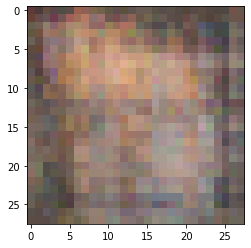

Step:  1510,         Gen. Loss: 2.3895,         Dis. Loss: 0.2365
Step:  1520,         Gen. Loss: 1.8894,         Dis. Loss: 0.3830
Step:  1530,         Gen. Loss: 1.6445,         Dis. Loss: 0.4455
Step:  1540,         Gen. Loss: 1.9248,         Dis. Loss: 0.2316
Step:  1550,         Gen. Loss: 2.0999,         Dis. Loss: 0.3494
Step:  1560,         Gen. Loss: 2.1201,         Dis. Loss: 0.4968
Step:  1570,         Gen. Loss: 2.3406,         Dis. Loss: 0.3260
Step:  1580,         Gen. Loss: 2.2497,         Dis. Loss: 0.2206
Step:  1590,         Gen. Loss: 2.8540,         Dis. Loss: 0.1296
Step:  1600,         Gen. Loss: 1.8790,         Dis. Loss: 0.3859


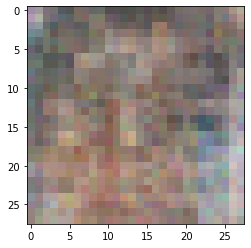

Step:  1610,         Gen. Loss: 1.8882,         Dis. Loss: 0.4699
Step:  1620,         Gen. Loss: 2.1083,         Dis. Loss: 0.4113
Step:  1630,         Gen. Loss: 1.9608,         Dis. Loss: 0.4034
Step:  1640,         Gen. Loss: 2.1375,         Dis. Loss: 0.3436
Step:  1650,         Gen. Loss: 2.7106,         Dis. Loss: 0.2497
Step:  1660,         Gen. Loss: 2.3763,         Dis. Loss: 0.2969
Step:  1670,         Gen. Loss: 2.4622,         Dis. Loss: 0.2042
Step:  1680,         Gen. Loss: 2.3595,         Dis. Loss: 0.2042
Step:  1690,         Gen. Loss: 2.7217,         Dis. Loss: 0.2330
Step:  1700,         Gen. Loss: 2.6404,         Dis. Loss: 0.1288


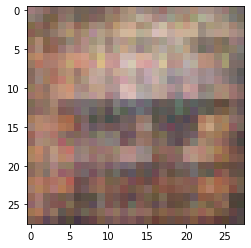

Step:  1710,         Gen. Loss: 2.3023,         Dis. Loss: 0.1791
Step:  1720,         Gen. Loss: 2.2085,         Dis. Loss: 0.1895
Step:  1730,         Gen. Loss: 2.9519,         Dis. Loss: 0.1747
Step:  1740,         Gen. Loss: 2.6489,         Dis. Loss: 0.1986
Step:  1750,         Gen. Loss: 2.5379,         Dis. Loss: 0.1677
Step:  1760,         Gen. Loss: 2.2952,         Dis. Loss: 0.1756
Step:  1770,         Gen. Loss: 2.4237,         Dis. Loss: 0.1639
Step:  1780,         Gen. Loss: 2.3613,         Dis. Loss: 0.3138
Step:  1790,         Gen. Loss: 2.0018,         Dis. Loss: 0.3895
Step:  1800,         Gen. Loss: 2.4191,         Dis. Loss: 0.2203


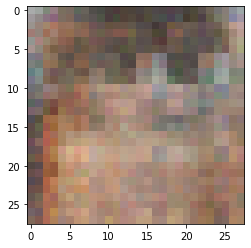

Step:  1810,         Gen. Loss: 2.3049,         Dis. Loss: 0.1504
Step:  1820,         Gen. Loss: 2.5453,         Dis. Loss: 0.1588
Step:  1830,         Gen. Loss: 2.4755,         Dis. Loss: 0.2251
Step:  1840,         Gen. Loss: 2.6381,         Dis. Loss: 0.2153
Step:  1850,         Gen. Loss: 1.9973,         Dis. Loss: 0.3776
Step:  1860,         Gen. Loss: 2.0965,         Dis. Loss: 0.3550
Step:  1870,         Gen. Loss: 1.9981,         Dis. Loss: 0.3011
Step:  1880,         Gen. Loss: 2.7760,         Dis. Loss: 0.2031
Step:  1890,         Gen. Loss: 2.4843,         Dis. Loss: 0.1851
Step:  1900,         Gen. Loss: 2.0187,         Dis. Loss: 0.2717


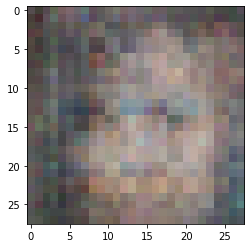

Step:  1910,         Gen. Loss: 1.8949,         Dis. Loss: 0.5685
Step:  1920,         Gen. Loss: 2.5338,         Dis. Loss: 0.2051
Step:  1930,         Gen. Loss: 2.3432,         Dis. Loss: 0.2026
Step:  1940,         Gen. Loss: 2.6720,         Dis. Loss: 0.1560
Step:  1950,         Gen. Loss: 2.5223,         Dis. Loss: 0.2360
Step:  1960,         Gen. Loss: 2.9327,         Dis. Loss: 0.2519
Step:  1970,         Gen. Loss: 2.5314,         Dis. Loss: 0.1865
Step:  1980,         Gen. Loss: 2.4618,         Dis. Loss: 0.1595
Step:  1990,         Gen. Loss: 2.4352,         Dis. Loss: 0.2477
Step:  2000,         Gen. Loss: 2.4263,         Dis. Loss: 0.2291


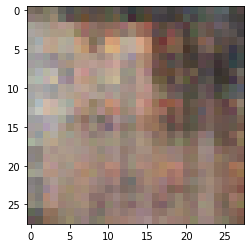

Step:  2010,         Gen. Loss: 2.7912,         Dis. Loss: 0.1704
Step:  2020,         Gen. Loss: 2.3325,         Dis. Loss: 0.2276
Step:  2030,         Gen. Loss: 2.3916,         Dis. Loss: 0.2359
Step:  2040,         Gen. Loss: 2.2279,         Dis. Loss: 0.2905
Step:  2050,         Gen. Loss: 2.2057,         Dis. Loss: 0.3506
Step:  2060,         Gen. Loss: 2.4721,         Dis. Loss: 0.2125
Step:  2070,         Gen. Loss: 3.2367,         Dis. Loss: 0.1116
Step:  2080,         Gen. Loss: 3.3081,         Dis. Loss: 0.0738
Step:  2090,         Gen. Loss: 3.0907,         Dis. Loss: 0.1181
Step:  2100,         Gen. Loss: 3.0704,         Dis. Loss: 0.0833


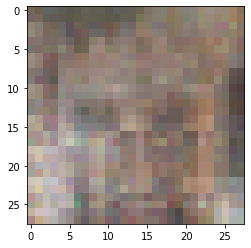

Step:  2110,         Gen. Loss: 2.0325,         Dis. Loss: 0.3270
Step:  2120,         Gen. Loss: 2.6090,         Dis. Loss: 0.2029
Step:  2130,         Gen. Loss: 2.4661,         Dis. Loss: 0.2402
Step:  2140,         Gen. Loss: 2.4478,         Dis. Loss: 0.2334
Step:  2150,         Gen. Loss: 2.4886,         Dis. Loss: 0.2182
Step:  2160,         Gen. Loss: 2.5278,         Dis. Loss: 0.1416
Step:  2170,         Gen. Loss: 2.1862,         Dis. Loss: 0.1928
Step:  2180,         Gen. Loss: 2.4298,         Dis. Loss: 0.2193
Step:  2190,         Gen. Loss: 2.7527,         Dis. Loss: 0.3047
Step:  2200,         Gen. Loss: 3.3711,         Dis. Loss: 0.1524


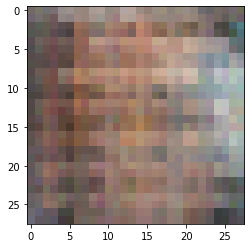

Step:  2210,         Gen. Loss: 3.4227,         Dis. Loss: 0.1189
Step:  2220,         Gen. Loss: 2.6269,         Dis. Loss: 0.2324
Step:  2230,         Gen. Loss: 2.6516,         Dis. Loss: 0.1432
Step:  2240,         Gen. Loss: 2.6729,         Dis. Loss: 0.1066
Step:  2250,         Gen. Loss: 2.8323,         Dis. Loss: 0.0955
Step:  2260,         Gen. Loss: 2.7279,         Dis. Loss: 0.2060
Step:  2270,         Gen. Loss: 2.5652,         Dis. Loss: 0.1837
Step:  2280,         Gen. Loss: 2.7032,         Dis. Loss: 0.2079
Step:  2290,         Gen. Loss: 2.5434,         Dis. Loss: 0.1753
Step:  2300,         Gen. Loss: 2.6704,         Dis. Loss: 0.1795


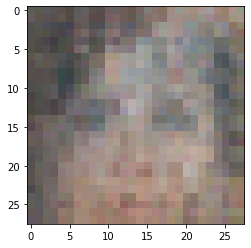

Step:  2310,         Gen. Loss: 1.8150,         Dis. Loss: 0.3129
Step:  2320,         Gen. Loss: 2.0975,         Dis. Loss: 0.2878
Step:  2330,         Gen. Loss: 2.0921,         Dis. Loss: 0.2041
Step:  2340,         Gen. Loss: 2.4466,         Dis. Loss: 0.2408
Step:  2350,         Gen. Loss: 3.6228,         Dis. Loss: 0.0533
Step:  2360,         Gen. Loss: 2.6861,         Dis. Loss: 0.1144
Step:  2370,         Gen. Loss: 2.3530,         Dis. Loss: 0.3918
Step:  2380,         Gen. Loss: 2.3932,         Dis. Loss: 0.2116
Step:  2390,         Gen. Loss: 2.2858,         Dis. Loss: 0.2404
Step:  2400,         Gen. Loss: 2.7988,         Dis. Loss: 0.2328


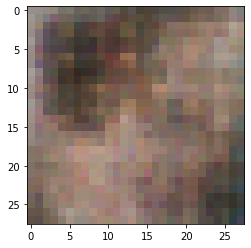

Step:  2410,         Gen. Loss: 2.5273,         Dis. Loss: 0.1598
Step:  2420,         Gen. Loss: 2.4320,         Dis. Loss: 0.1940
Step:  2430,         Gen. Loss: 2.7240,         Dis. Loss: 0.1968
Step:  2440,         Gen. Loss: 2.7356,         Dis. Loss: 0.2490
Step:  2450,         Gen. Loss: 3.1164,         Dis. Loss: 0.1051
Step:  2460,         Gen. Loss: 2.2519,         Dis. Loss: 0.2211
Step:  2470,         Gen. Loss: 3.2092,         Dis. Loss: 0.1313
Step:  2480,         Gen. Loss: 2.9436,         Dis. Loss: 0.1916
Step:  2490,         Gen. Loss: 2.2703,         Dis. Loss: 0.2781
Step:  2500,         Gen. Loss: 3.1452,         Dis. Loss: 0.1702


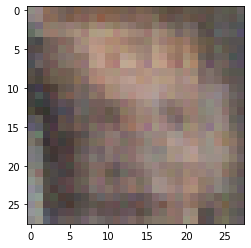

Step:  2510,         Gen. Loss: 2.0893,         Dis. Loss: 0.5739
Step:  2520,         Gen. Loss: 1.6211,         Dis. Loss: 0.7422
Step:  2530,         Gen. Loss: 2.2902,         Dis. Loss: 0.2721
Step:  2540,         Gen. Loss: 1.2681,         Dis. Loss: 0.5959
Step:  2550,         Gen. Loss: 1.7462,         Dis. Loss: 0.3791
Step:  2560,         Gen. Loss: 2.3240,         Dis. Loss: 0.4611
Step:  2570,         Gen. Loss: 2.2246,         Dis. Loss: 0.3185
Step:  2580,         Gen. Loss: 2.7478,         Dis. Loss: 0.4524
Step:  2590,         Gen. Loss: 1.4526,         Dis. Loss: 0.4827
Step:  2600,         Gen. Loss: 1.8151,         Dis. Loss: 0.3351


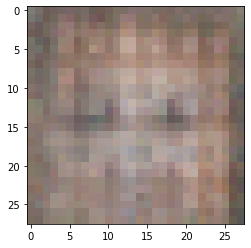

Step:  2610,         Gen. Loss: 2.1397,         Dis. Loss: 0.4562
Step:  2620,         Gen. Loss: 1.6570,         Dis. Loss: 0.3254
Step:  2630,         Gen. Loss: 2.0856,         Dis. Loss: 0.2939
Step:  2640,         Gen. Loss: 1.9608,         Dis. Loss: 0.3039
Step:  2650,         Gen. Loss: 2.9753,         Dis. Loss: 0.1653
Step:  2660,         Gen. Loss: 2.5156,         Dis. Loss: 0.2170
Step:  2670,         Gen. Loss: 2.0485,         Dis. Loss: 0.1746
Step:  2680,         Gen. Loss: 2.2176,         Dis. Loss: 0.3349
Step:  2690,         Gen. Loss: 2.8646,         Dis. Loss: 0.3357
Step:  2700,         Gen. Loss: 2.7946,         Dis. Loss: 0.1237


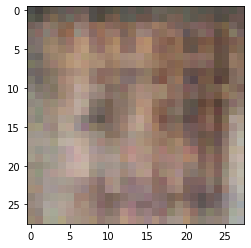

Step:  2710,         Gen. Loss: 2.5582,         Dis. Loss: 0.4090
Step:  2720,         Gen. Loss: 2.2816,         Dis. Loss: 0.3174
Step:  2730,         Gen. Loss: 2.8698,         Dis. Loss: 0.1837
Step:  2740,         Gen. Loss: 2.6986,         Dis. Loss: 0.2450
Step:  2750,         Gen. Loss: 1.4991,         Dis. Loss: 0.4251
Step:  2760,         Gen. Loss: 1.6553,         Dis. Loss: 0.3839
Step:  2770,         Gen. Loss: 2.2441,         Dis. Loss: 0.3084
Step:  2780,         Gen. Loss: 1.3402,         Dis. Loss: 0.6655
Step:  2790,         Gen. Loss: 1.7580,         Dis. Loss: 0.7387
Step:  2800,         Gen. Loss: 1.0491,         Dis. Loss: 0.8707


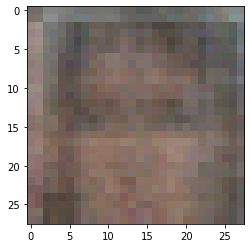

Step:  2810,         Gen. Loss: 2.0390,         Dis. Loss: 0.3752
Step:  2820,         Gen. Loss: 1.6947,         Dis. Loss: 0.6158
Step:  2830,         Gen. Loss: 1.8562,         Dis. Loss: 0.6134
Step:  2840,         Gen. Loss: 1.0266,         Dis. Loss: 0.5821
Step:  2850,         Gen. Loss: 1.4519,         Dis. Loss: 0.4192
Step:  2860,         Gen. Loss: 1.9854,         Dis. Loss: 0.3699
Step:  2870,         Gen. Loss: 1.5114,         Dis. Loss: 0.4255
Step:  2880,         Gen. Loss: 1.0426,         Dis. Loss: 0.6862
Step:  2890,         Gen. Loss: 1.5473,         Dis. Loss: 0.5098
Step:  2900,         Gen. Loss: 2.4107,         Dis. Loss: 0.2115


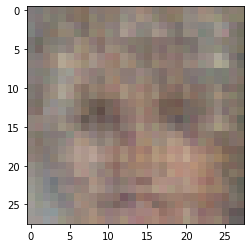

Step:  2910,         Gen. Loss: 2.6560,         Dis. Loss: 0.2039
Step:  2920,         Gen. Loss: 2.3970,         Dis. Loss: 0.3383
Step:  2930,         Gen. Loss: 1.4486,         Dis. Loss: 0.4643
Step:  2940,         Gen. Loss: 1.4985,         Dis. Loss: 0.6499
Step:  2950,         Gen. Loss: 1.0977,         Dis. Loss: 0.6572
Step:  2960,         Gen. Loss: 1.9137,         Dis. Loss: 0.3720
Step:  2970,         Gen. Loss: 1.6455,         Dis. Loss: 0.4212
Step:  2980,         Gen. Loss: 2.0660,         Dis. Loss: 0.4067
Step:  2990,         Gen. Loss: 1.6537,         Dis. Loss: 0.5149
Step:  3000,         Gen. Loss: 1.8867,         Dis. Loss: 0.3727


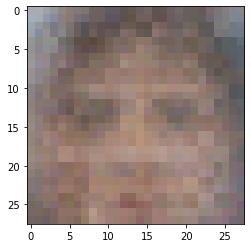

Step:  3010,         Gen. Loss: 1.8610,         Dis. Loss: 0.6519
Step:  3020,         Gen. Loss: 1.6671,         Dis. Loss: 0.4295
Step:  3030,         Gen. Loss: 1.6702,         Dis. Loss: 0.7641
Step:  3040,         Gen. Loss: 2.2539,         Dis. Loss: 0.2873
Step:  3050,         Gen. Loss: 2.5505,         Dis. Loss: 0.5718
Step:  3060,         Gen. Loss: 2.5342,         Dis. Loss: 0.5881
Step:  3070,         Gen. Loss: 3.2177,         Dis. Loss: 0.3200
Step:  3080,         Gen. Loss: 2.3070,         Dis. Loss: 0.4576
Step:  3090,         Gen. Loss: 1.6993,         Dis. Loss: 0.4973
Step:  3100,         Gen. Loss: 2.0094,         Dis. Loss: 0.4397


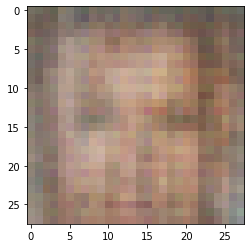

Step:  3110,         Gen. Loss: 0.2999,         Dis. Loss: 1.5194
Step:  3120,         Gen. Loss: 3.0893,         Dis. Loss: 0.7601
Step:  3130,         Gen. Loss: 0.6655,         Dis. Loss: 0.8355
Step:  3140,         Gen. Loss: 2.0404,         Dis. Loss: 0.4250
Step:  3150,         Gen. Loss: 2.9791,         Dis. Loss: 0.4947
Step:  3160,         Gen. Loss: 0.5567,         Dis. Loss: 1.0537


In [36]:
itr = 0
for e in range(epochs):
    for batch_inputs in celeba_dataset.get_batches(batch_size):
        itr+=1
        g_loss, d_loss, g_grad, d_grad = train_gan(generator, discriminator, batch_inputs)
        g_opt.apply_gradients(zip(g_grad, generator.trainable_variables))
        d_opt.apply_gradients(zip(d_grad, discriminator.trainable_variables))
        if itr%10==0:
            print("Step: {:5},         Gen. Loss: {:.4f},         Dis. Loss: {:.4f}".format(itr, g_loss, d_loss))
        
        if itr%100==0:
            fake = generator(rand_seed)
            fake = ((fake.numpy()).reshape(28,28, out_channel_dim)+1)/2
            pyplot.imshow(fake)
            pyplot.show()
            fake_faces.append(fake)

In [73]:
from PIL import image

fp_out = "image.gif"

img, *imgs = [Image.fromarray((fake*255).astype(np.uint8), 'RGB') for fake in fake_faces]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)